# 07/15/2024 Monday


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Total number of rows: 596
Number of unique rows: 588
Number of potential duplicates: 8

Permutation Importance:
                          feature  importance
31                            Gap    0.522212
30               Change from Open    0.426309
33                Relative Volume    0.324290
0                      Market Cap    0.053158
18             Performance (Week)    0.034419
4         Institutional Ownership    0.004609
15           Performance (1 Hour)    0.003192
27   20-Day Simple Moving Average    0.001902
24             Average True Range    0.001856
26             Volatility (Month)    0.001850
29  200-Day Simple Moving Average    0.001548
39                          Price    0.001316
22             Performance (Year)    0.001292
1                    Shares Float    0.001288
32                 Average Volume    0.001224
20          Performance

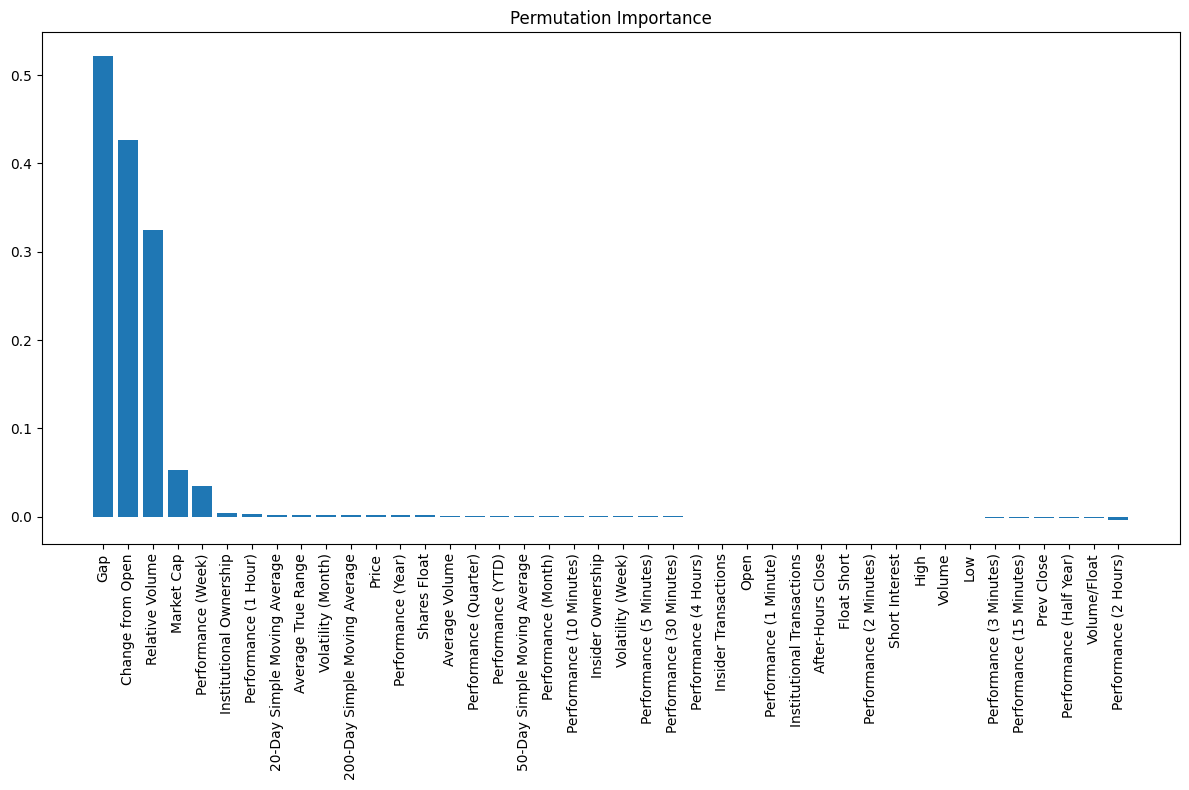


Built-in Feature Importances:
                          feature  importance
33                Relative Volume    0.376356
31                            Gap    0.189376
30               Change from Open    0.187908
18             Performance (Week)    0.067921
17          Performance (4 Hours)    0.046965
16          Performance (2 Hours)    0.028455
0                      Market Cap    0.023294
4         Institutional Ownership    0.012303
41                   Volume/Float    0.008288
34                         Volume    0.005762
32                 Average Volume    0.003913
23              Performance (YTD)    0.003705
29  200-Day Simple Moving Average    0.003605
8          Performance (1 Minute)    0.002801
20          Performance (Quarter)    0.002741
12       Performance (10 Minutes)    0.002707
13       Performance (15 Minutes)    0.002596
39                          Price    0.002453
14       Performance (30 Minutes)    0.002374
27   20-Day Simple Moving Average    0.002353
10 

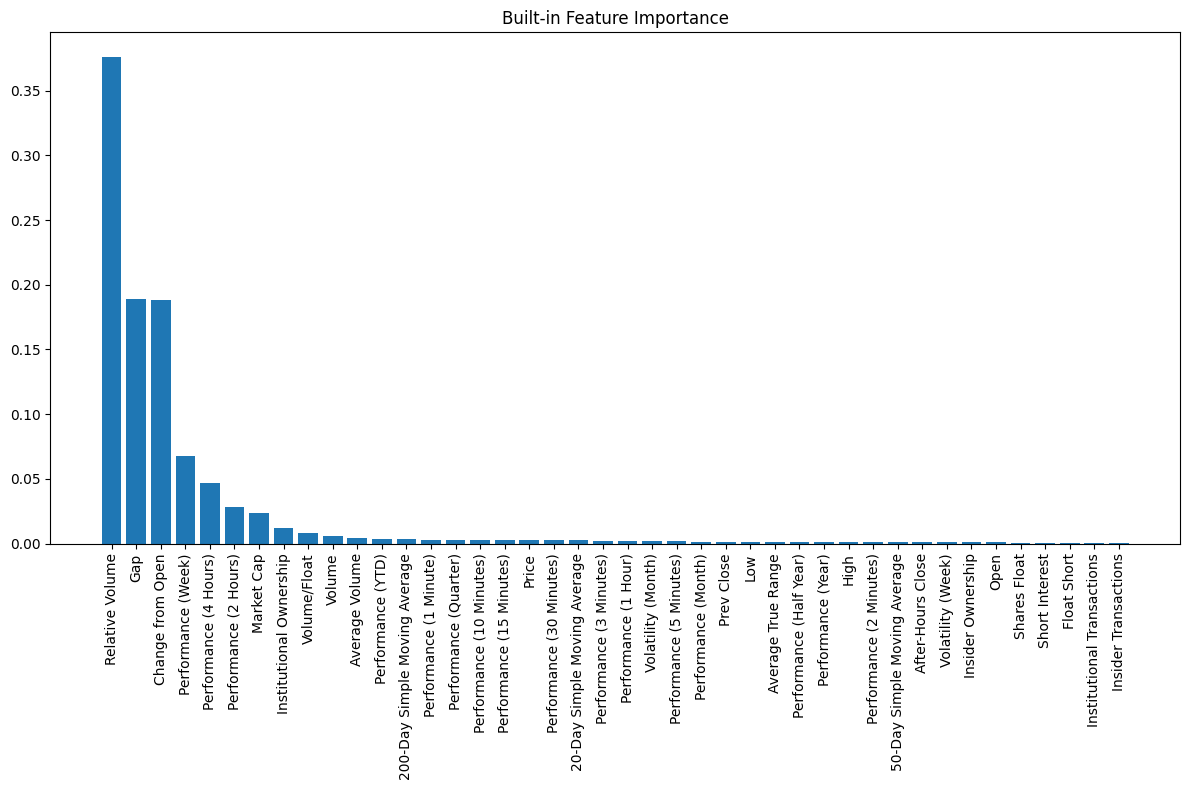

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from google.colab import drive
import glob


drive.mount('/content/drive')


def process_csv(file_path):
    df = pd.read_csv(file_path)

    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                df[col] = df[col].str.rstrip('%').astype('float') / 100.0
            except:
                pass
    return df

# Get all CSV files in the directory
csv_files = glob.glob('/content/drive/MyDrive/DS200Labs/Monday/*.csv')

# Process all CSV files
all_data = []
for file in csv_files:
    df = process_csv(file)
    all_data.append(df)

# Combine all data
combined_data = pd.concat(all_data, ignore_index=True)

# Print information about the dataset
print(f"Total number of rows: {len(combined_data)}")
print(f"Number of unique rows: {combined_data.drop_duplicates().shape[0]}")
print(f"Number of potential duplicates: {len(combined_data) - combined_data.drop_duplicates().shape[0]}")

# Prepare features and target
feature_columns = ['Market Cap', 'Shares Float',
       'Insider Ownership', 'Insider Transactions', 'Institutional Ownership',
       'Institutional Transactions', 'Float Short', 'Short Interest',
       'Performance (1 Minute)', 'Performance (2 Minutes)',
       'Performance (3 Minutes)', 'Performance (5 Minutes)',
       'Performance (10 Minutes)', 'Performance (15 Minutes)',
       'Performance (30 Minutes)', 'Performance (1 Hour)',
       'Performance (2 Hours)', 'Performance (4 Hours)', 'Performance (Week)',
       'Performance (Month)', 'Performance (Quarter)',
       'Performance (Half Year)', 'Performance (Year)', 'Performance (YTD)',
       'Average True Range', 'Volatility (Week)', 'Volatility (Month)',
       '20-Day Simple Moving Average', '50-Day Simple Moving Average',
       '200-Day Simple Moving Average', 'Change from Open',
       'Gap', 'Average Volume', 'Relative Volume', 'Volume', 'Prev Close',
       'Open', 'High', 'Low', 'Price', 'After-Hours Close']


for col in feature_columns + ['Change']:
    if combined_data[col].dtype == 'object':
        combined_data[col] = pd.to_numeric(combined_data[col], errors='coerce')

# Add new feature 'Volume/Float'
combined_data['Volume/Float'] = combined_data['Volume'] / combined_data['Shares Float']
feature_columns.append('Volume/Float')

# Remove rows where 'Change' (target variable) is NaN
combined_data = combined_data.dropna(subset=['Change'])

X = combined_data[feature_columns]
y = combined_data['Change']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Calculate permutation importance
perm_importance = permutation_importance(rf, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Create and sort feature importance DataFrame
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': perm_importance.importances_mean
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Print feature importances
print("\nPermutation Importance:")
print(feature_importance)

# Visualize feature importances
plt.figure(figsize=(12, 8))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.title('Permutation Importance')
plt.tight_layout()
plt.show()

# built-in feature importances
builtin_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf.feature_importances_
})
builtin_importance = builtin_importance.sort_values('importance', ascending=False)

print("\nBuilt-in Feature Importances:")
print(builtin_importance)

plt.figure(figsize=(12, 8))
plt.bar(builtin_importance['feature'], builtin_importance['importance'])
plt.xticks(rotation=90)
plt.title('Built-in Feature Importance')
plt.tight_layout()
plt.show()


Gradient Boosting - Permutation Importance:
                          feature    importance
31                            Gap  5.610102e-01
30               Change from Open  5.151444e-01
33                Relative Volume  4.032891e-01
0                      Market Cap  8.479462e-02
18             Performance (Week)  4.649769e-02
34                         Volume  3.745956e-03
27   20-Day Simple Moving Average  1.815143e-03
17          Performance (4 Hours)  9.388237e-04
14       Performance (30 Minutes)  8.696090e-04
1                    Shares Float  8.033909e-04
11        Performance (5 Minutes)  7.868693e-04
36                           Open  7.117780e-04
15           Performance (1 Hour)  5.591301e-04
4         Institutional Ownership  3.028047e-04
32                 Average Volume  2.516156e-04
22             Performance (Year)  2.385835e-04
21        Performance (Half Year)  1.862160e-04
10        Performance (3 Minutes)  1.685820e-04
16          Performance (2 Hours)  9.830033

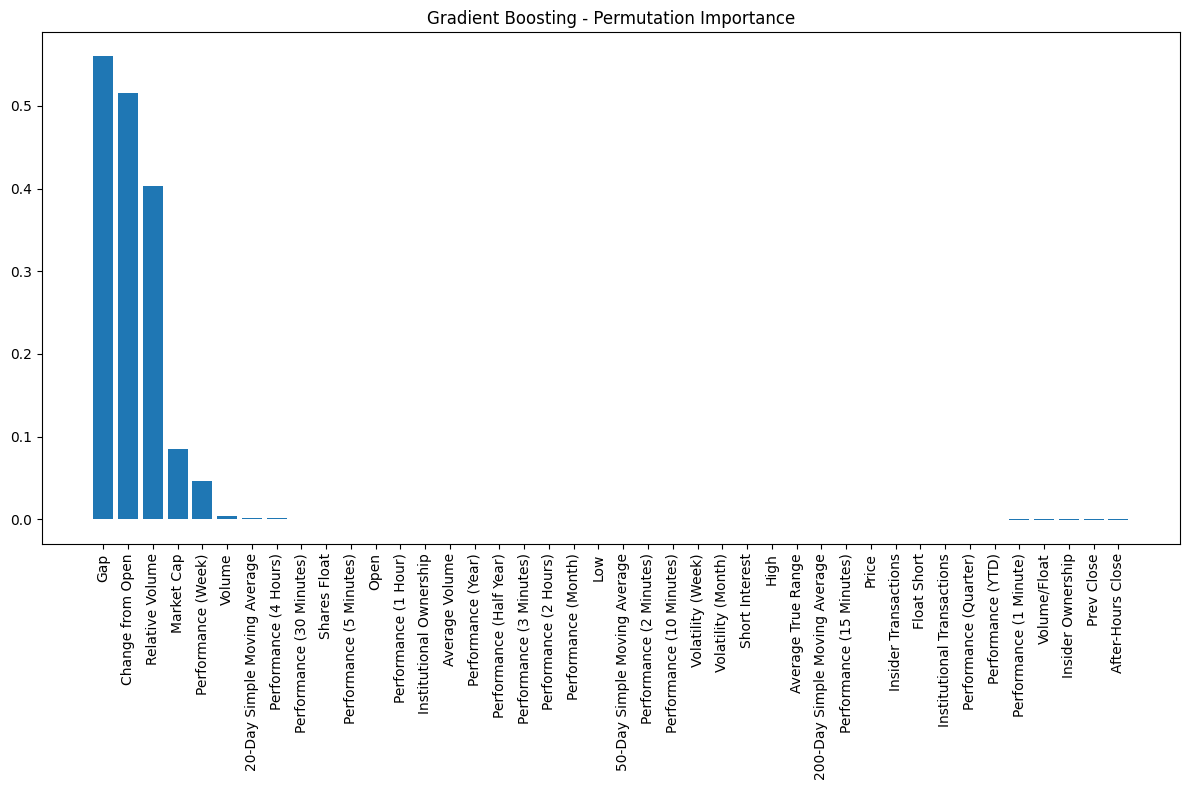


Gradient Boosting - Built-in Feature Importances:
                          feature  importance
33                Relative Volume    0.382226
30               Change from Open    0.253438
31                            Gap    0.230260
0                      Market Cap    0.041847
18             Performance (Week)    0.039236
17          Performance (4 Hours)    0.014718
41                   Volume/Float    0.009478
13       Performance (15 Minutes)    0.005616
34                         Volume    0.004315
16          Performance (2 Hours)    0.003464
9         Performance (2 Minutes)    0.002127
19            Performance (Month)    0.001797
10        Performance (3 Minutes)    0.001782
23              Performance (YTD)    0.001586
27   20-Day Simple Moving Average    0.001046
12       Performance (10 Minutes)    0.000892
28   50-Day Simple Moving Average    0.000817
36                           Open    0.000810
40              After-Hours Close    0.000660
11        Performance (5 Minu

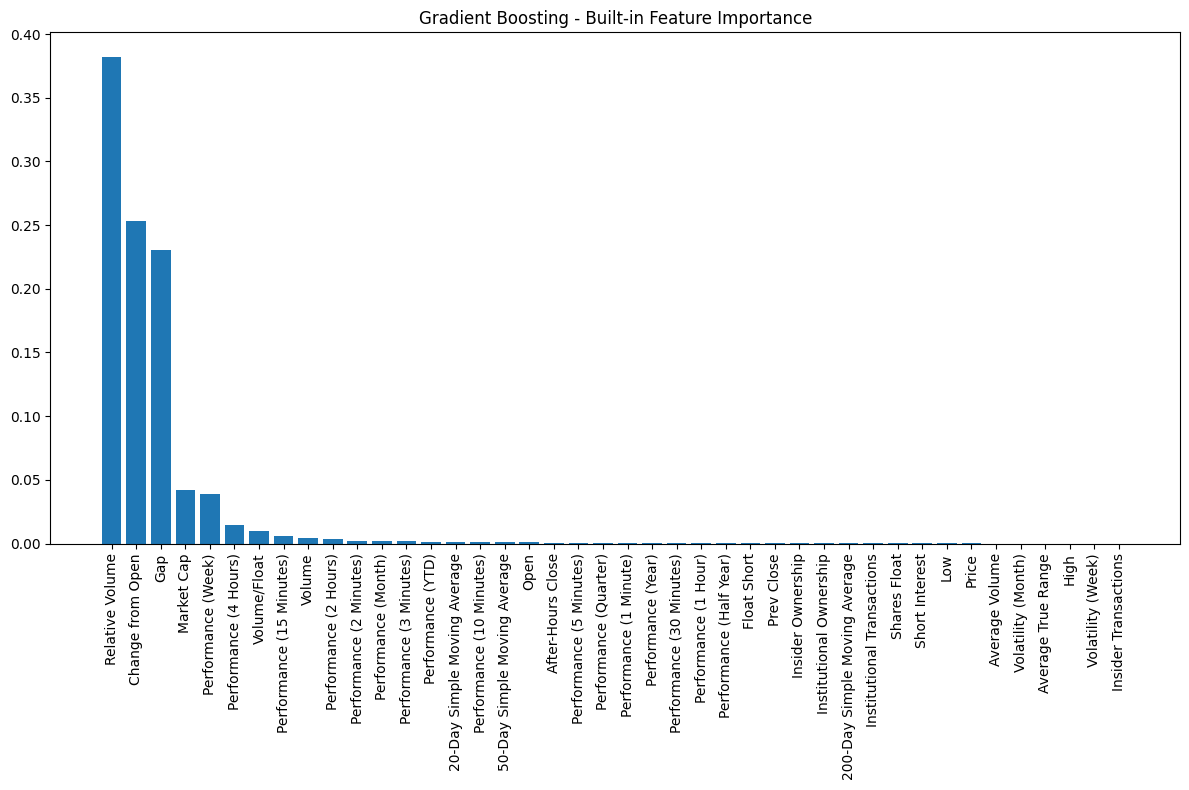

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting model
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train_scaled, y_train)

# Calculate permutation importance
gb_perm_importance = permutation_importance(gb, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Create and sort feature importance DataFrame for permutation importance
gb_feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': gb_perm_importance.importances_mean
})
gb_feature_importance = gb_feature_importance.sort_values('importance', ascending=False)

# Print Gradient Boosting permutation importances
print("\nGradient Boosting - Permutation Importance:")
print(gb_feature_importance)

# Visualize Gradient Boosting permutation importances
plt.figure(figsize=(12, 8))
plt.bar(gb_feature_importance['feature'], gb_feature_importance['importance'])
plt.xticks(rotation=90)
plt.title('Gradient Boosting - Permutation Importance')
plt.tight_layout()
plt.show()

#built-in feature importances
gb_builtin_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': gb.feature_importances_
})
gb_builtin_importance = gb_builtin_importance.sort_values('importance', ascending=False)

# Print Gradient Boosting built-in feature importances
print("\nGradient Boosting - Built-in Feature Importances:")
print(gb_builtin_importance)

# Visualize Gradient Boosting built-in feature importances
plt.figure(figsize=(12, 8))
plt.bar(gb_builtin_importance['feature'], gb_builtin_importance['importance'])
plt.xticks(rotation=90)
plt.title('Gradient Boosting - Built-in Feature Importance')
plt.tight_layout()
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.6 MB/s eta 0:00:00


  0%|          | 0/100 [00:00<?, ?it/s]

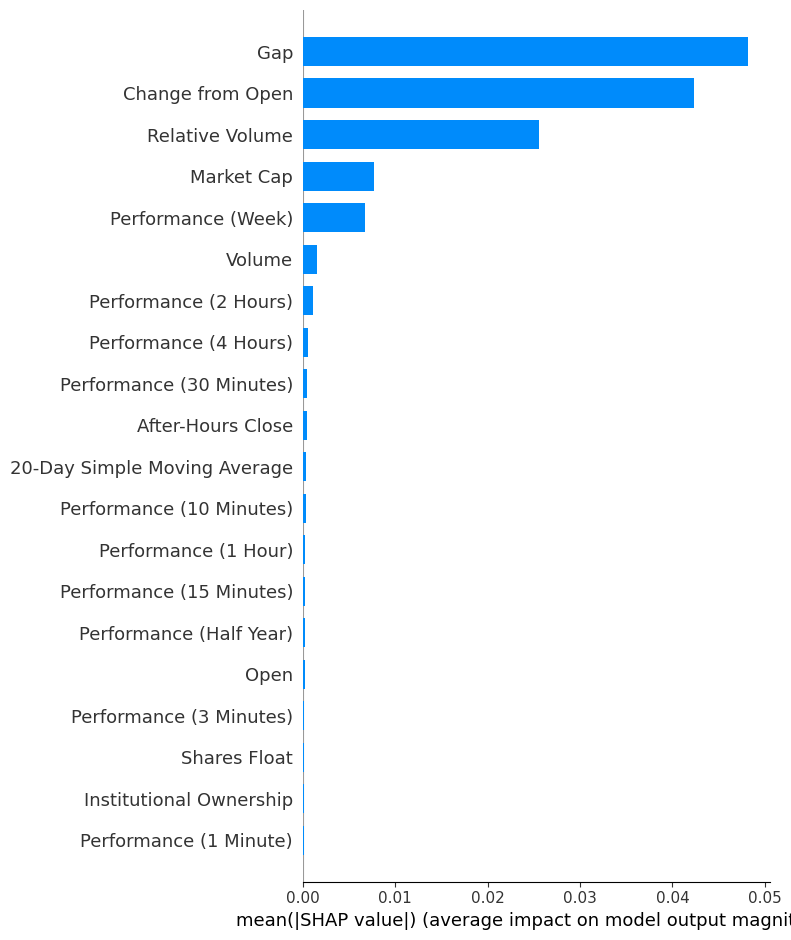

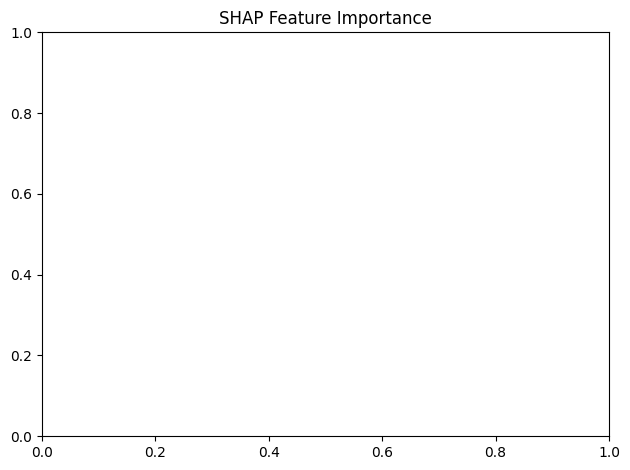

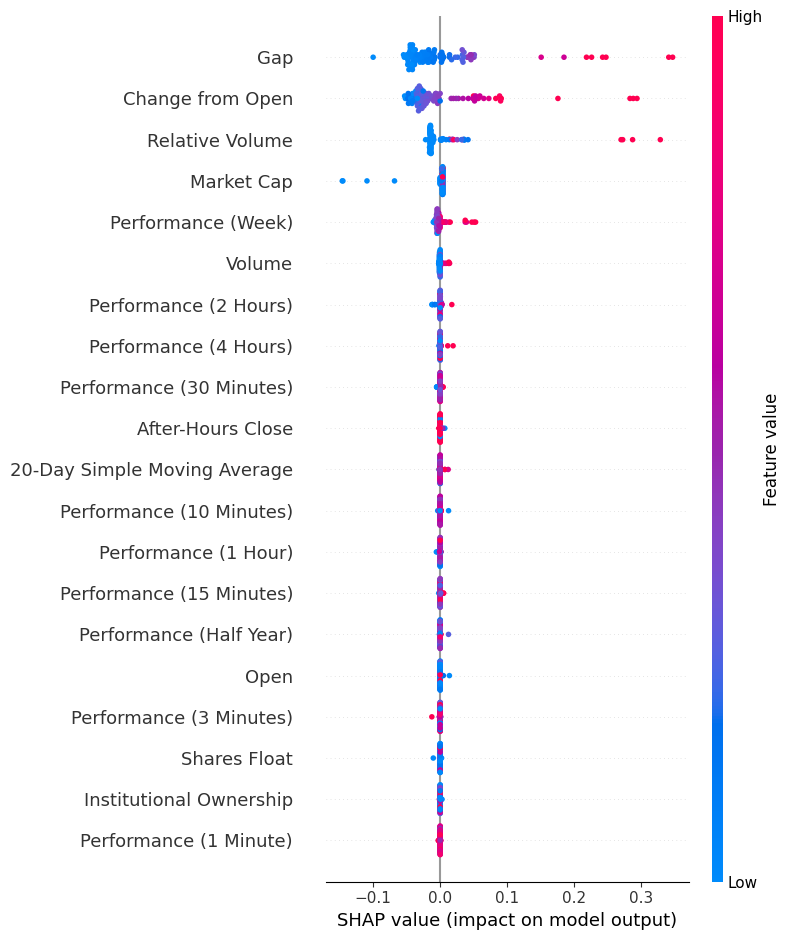

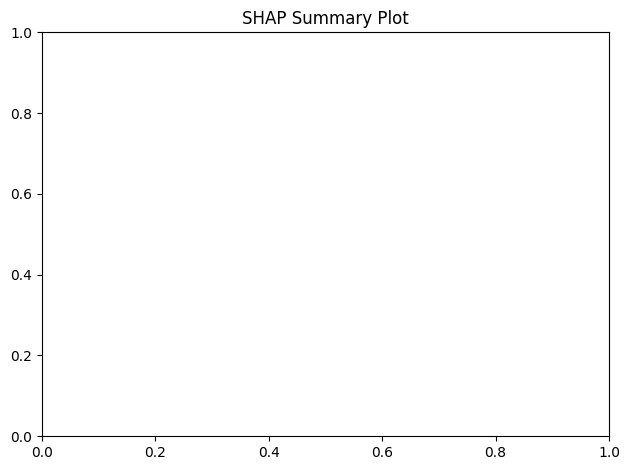

<Figure size 1200x800 with 0 Axes>

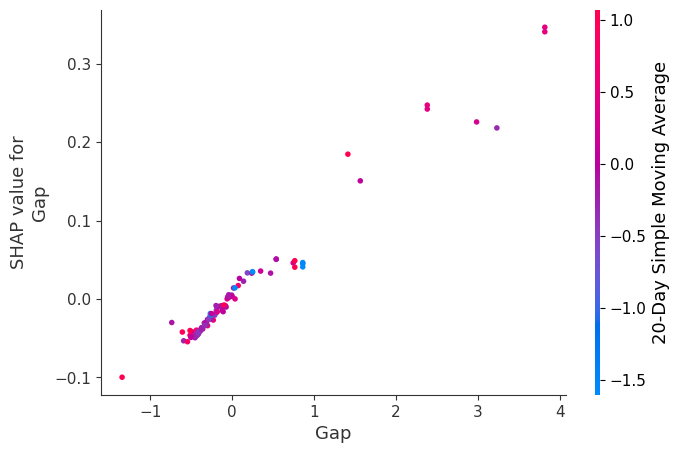

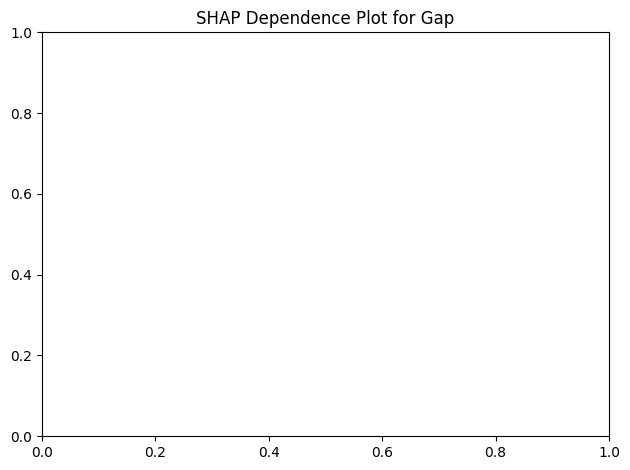

<Figure size 1200x800 with 0 Axes>

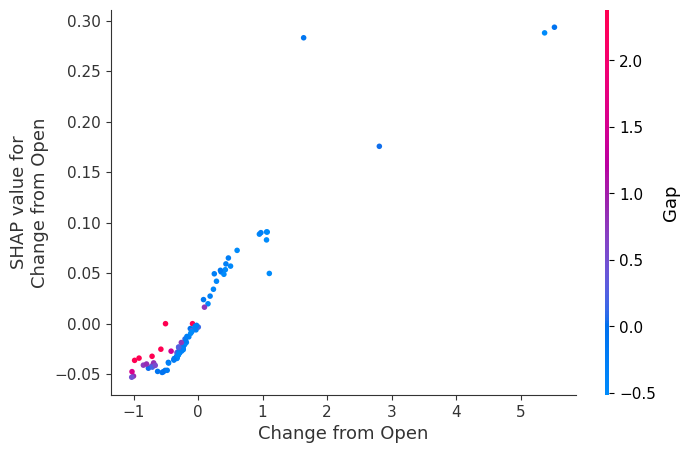

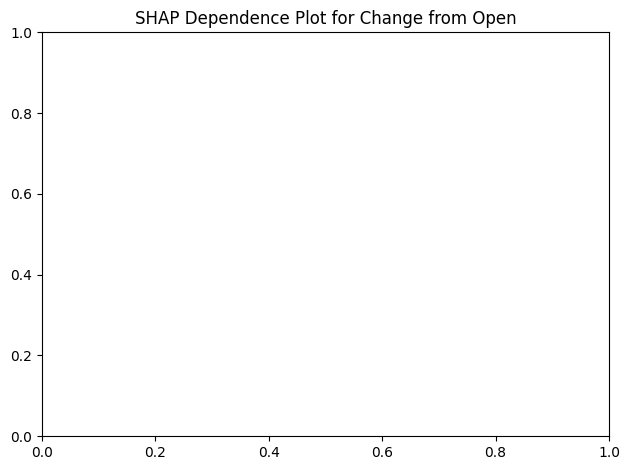

<Figure size 1200x800 with 0 Axes>

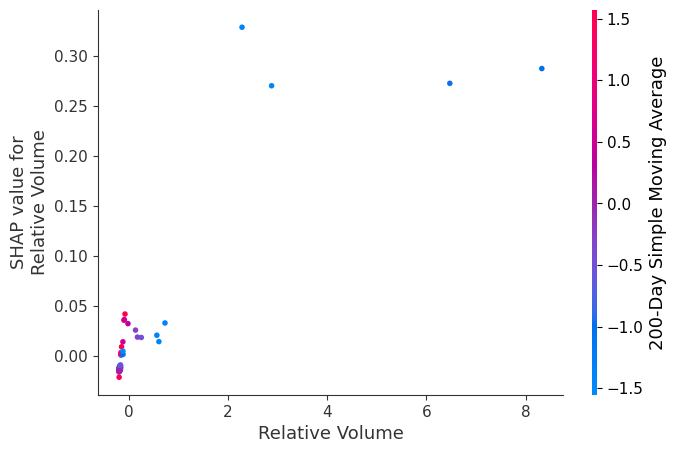

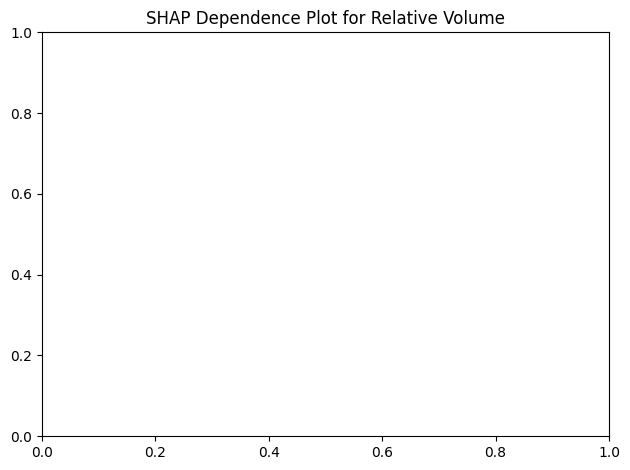

In [ ]:
!pip install shap
import shap
import matplotlib.pyplot as plt

# Create a SHAP KernelExplainer
explainer = shap.KernelExplainer(gb.predict, shap.sample(X_test_scaled, 100))

# Calculate SHAP values for a subset of the test data
shap_values = explainer.shap_values(X_test_scaled[:100], nsamples=100)

# Summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_scaled[:100], plot_type="bar", feature_names=feature_columns)
plt.title('SHAP Feature Importance')
plt.tight_layout()
plt.show()

# Detailed SHAP summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_scaled[:100], feature_names=feature_columns)
plt.title('SHAP Summary Plot')
plt.tight_layout()
plt.show()

# SHAP dependence plots for top features
top_features = gb_feature_importance['feature'].head(3).tolist()
for feature in top_features:
    plt.figure(figsize=(12, 8))
    shap.dependence_plot(feature, shap_values, X_test_scaled[:100], feature_names=feature_columns)
    plt.title(f'SHAP Dependence Plot for {feature}')
    plt.tight_layout()
    plt.show()


Feature Importances (including product features):
                                           feature  importance
641             Performance (Week)*Relative Volume    0.504127
30                                Change from Open    0.124466
31                                             Gap    0.043730
837                           Change from Open*Gap    0.023622
633           Performance (Week)*Volatility (Week)    0.018608
..                                             ...         ...
742                       Performance (YTD)*Volume   -0.001936
567                       Performance (1 Hour)*Gap   -0.002578
751          Average True Range*Volatility (Month)   -0.003010
606  Performance (4 Hours)*Performance (Half Year)   -0.003678
109      Shares Float*50-Day Simple Moving Average   -0.004596

[903 rows x 2 columns]


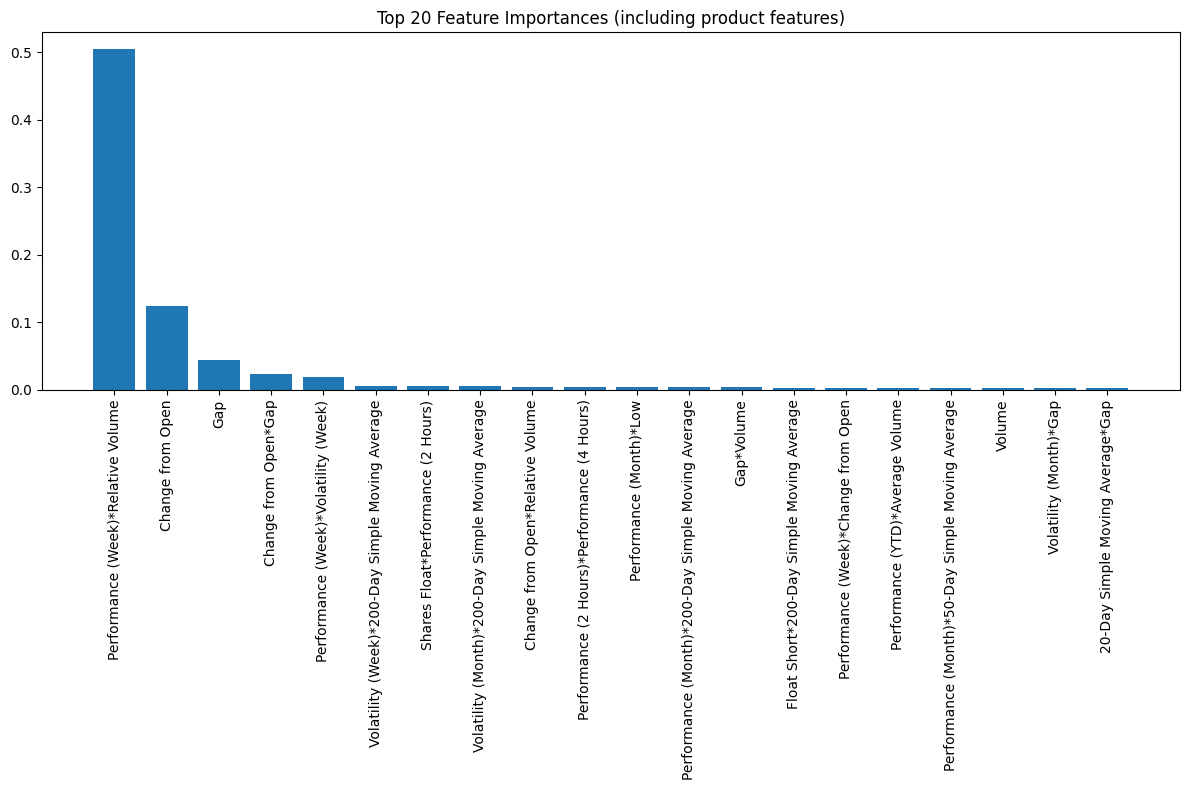

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import itertools
import shap


# Function to create product features
def create_product_features(X):
    numeric_cols = X.select_dtypes(include=[np.number]).columns
    product_features = {}
    for col1, col2 in itertools.combinations(numeric_cols, 2):
        product_features[f'{col1}*{col2}'] = X[col1] * X[col2]
    return pd.concat([X, pd.DataFrame(product_features)], axis=1)

# Create product features
X_with_products = create_product_features(X.copy())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_with_products, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Train Gradient Boosting model
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train_scaled, y_train)

# Calculate permutation importance
perm_importance = permutation_importance(gb, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Create and sort feature importance DataFrame
feature_importance = pd.DataFrame({
    'feature': X_with_products.columns,
    'importance': perm_importance.importances_mean
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Print feature importances
print("\nFeature Importances (including product features):")
print(feature_importance)

# Visualize feature importances
plt.figure(figsize=(12, 8))
plt.bar(feature_importance['feature'][:20], feature_importance['importance'][:20])
plt.xticks(rotation=90)
plt.title('Top 20 Feature Importances (including product features)')
plt.tight_layout()
plt.show()

  0%|          | 0/120 [00:00<?, ?it/s]

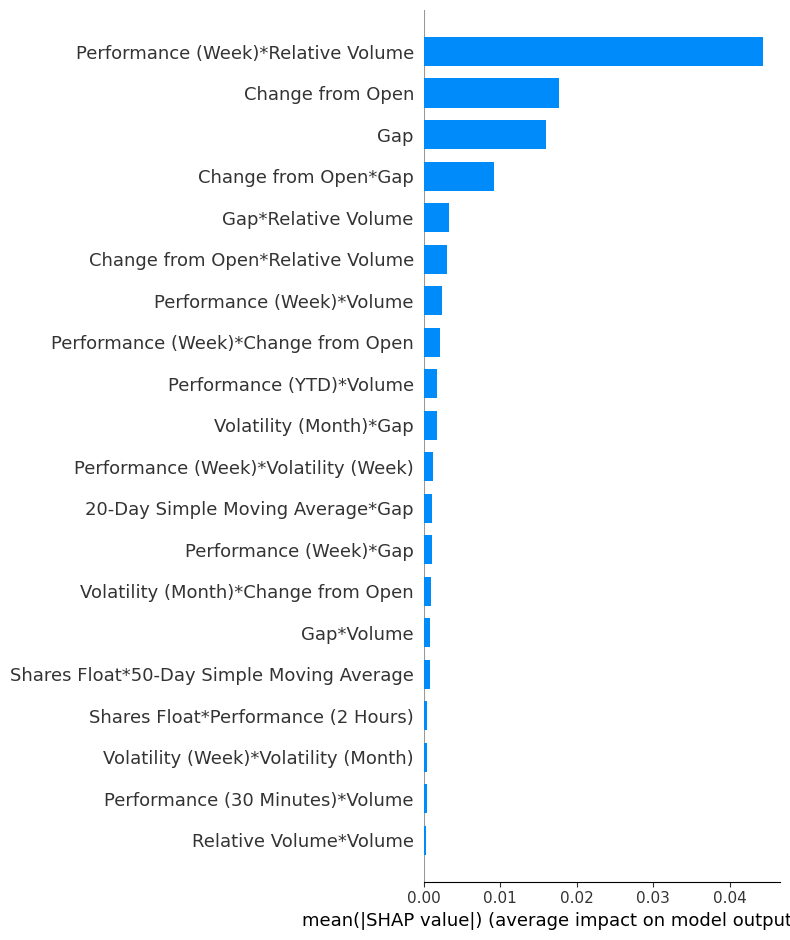

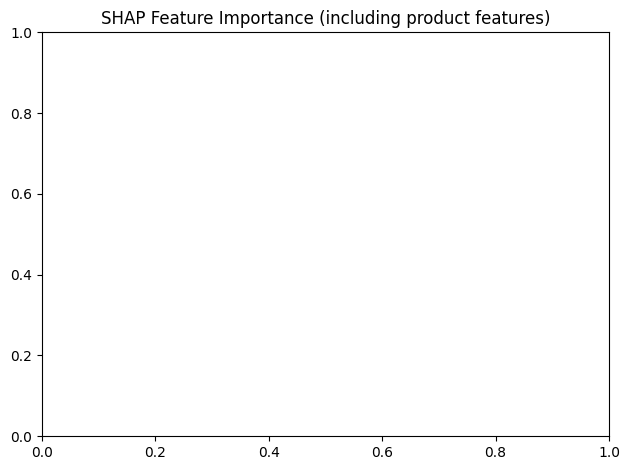

IndexError: index 105 is out of bounds for axis 0 with size 100

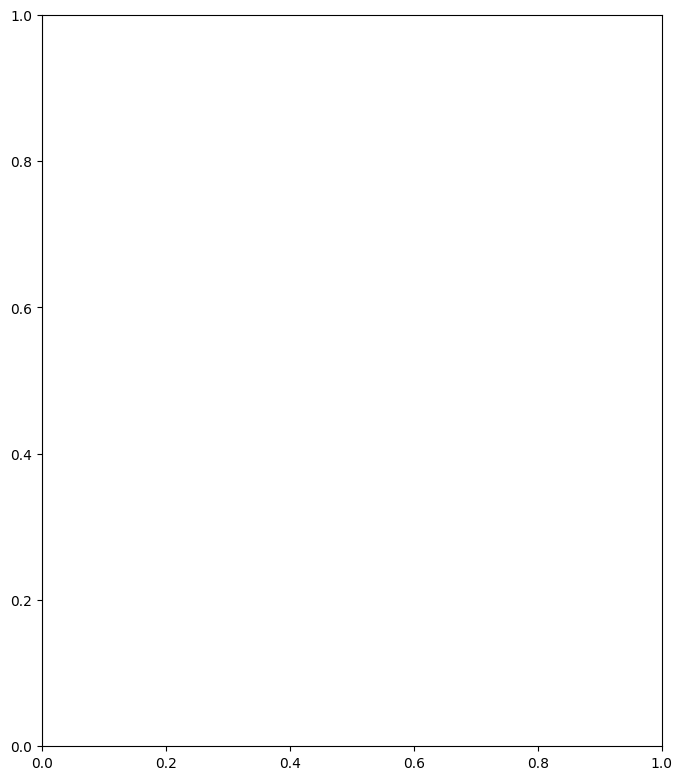

In [ ]:
# SHAP Analysis
# Create a SHAP explainer
explainer = shap.KernelExplainer(gb.predict, shap.sample(X_test_scaled, 100))

# Calculate SHAP values for a subset of the test data
shap_values = explainer.shap_values(X_test_scaled[:500], nsamples=500)

# Summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_scaled[:100], plot_type="bar", feature_names=X_with_products.columns)
plt.title('SHAP Feature Importance (including product features)')
plt.tight_layout()
plt.show()

# Detailed SHAP summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_scaled[:100], feature_names=X_with_products.columns)
plt.title('SHAP Summary Plot (including product features)')
plt.tight_layout()
plt.show()

# SHAP dependence plots for top features
top_features = feature_importance['feature'].head(3).tolist()
for feature in top_features:
    plt.figure(figsize=(12, 8))
    shap.dependence_plot(feature, shap_values, X_test_scaled[:100], feature_names=X_with_products.columns)
    plt.title(f'SHAP Dependence Plot for {feature}')
    plt.tight_layout()
    plt.show()

# 07/16/2024 Tuesday

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Total number of rows: 367
Number of unique rows: 367
Number of potential duplicates: 0

Permutation Importance:
                          feature  importance
36                         Volume    0.711630
17           Performance (1 Hour)    0.052357
33                            Gap    0.051697
32               Change from Open    0.048260
18          Performance (2 Hours)    0.039400
16       Performance (30 Minutes)    0.021776
19          Performance (4 Hours)    0.017433
35                Relative Volume    0.016301
42                   Volume/Float    0.011277
14       Performance (10 Minutes)    0.007432
0                      Market Cap    0.005696
29   20-Day Simple Moving Average    0.004220
40                            Low    0.003170
26             Average True Range    0.002040
2                    Shares Float    0.002031
5         Institutional

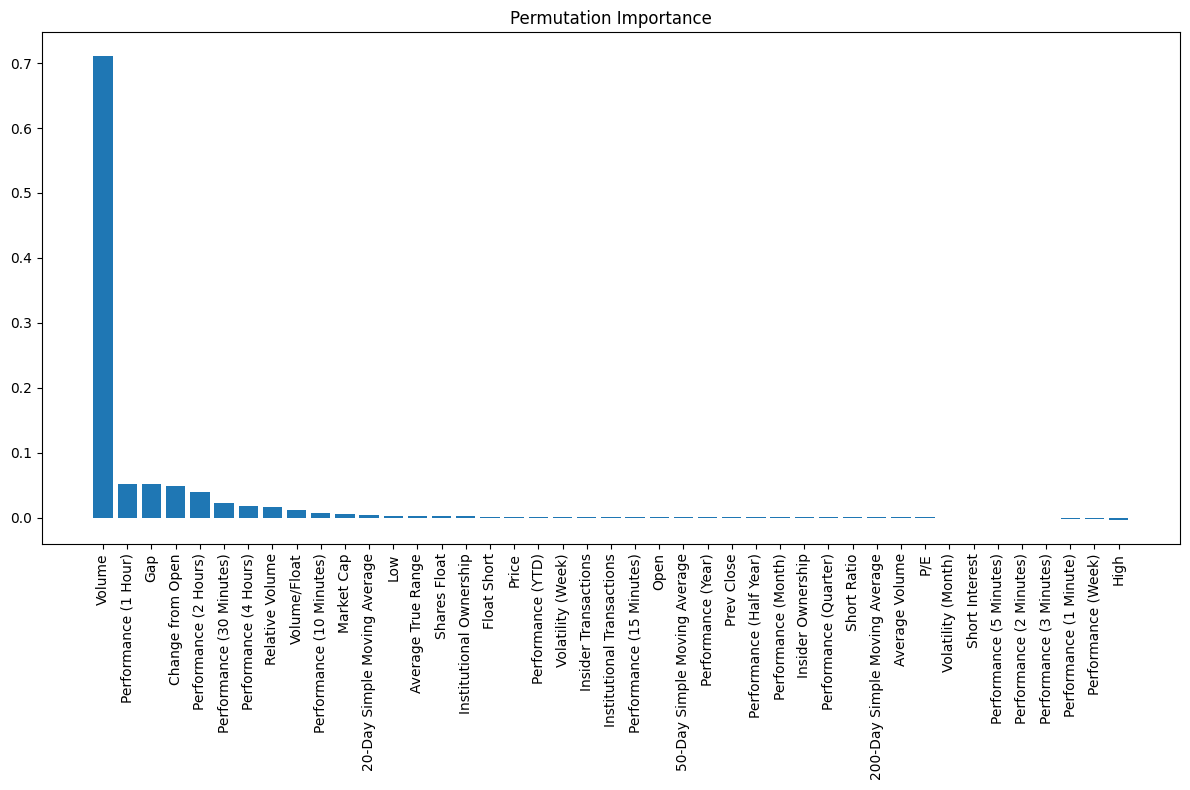


Built-in Feature Importances:
                          feature  importance
36                         Volume    0.766947
32               Change from Open    0.034650
33                            Gap    0.034120
18          Performance (2 Hours)    0.033889
17           Performance (1 Hour)    0.028516
19          Performance (4 Hours)    0.016445
16       Performance (30 Minutes)    0.016211
29   20-Day Simple Moving Average    0.008196
42                   Volume/Float    0.008131
40                            Low    0.007430
15       Performance (15 Minutes)    0.004832
35                Relative Volume    0.004001
0                      Market Cap    0.003800
38                           Open    0.003666
10         Performance (1 Minute)    0.002909
20             Performance (Week)    0.002257
6      Institutional Transactions    0.002173
14       Performance (10 Minutes)    0.001997
26             Average True Range    0.001776
39                           High    0.001552
21 

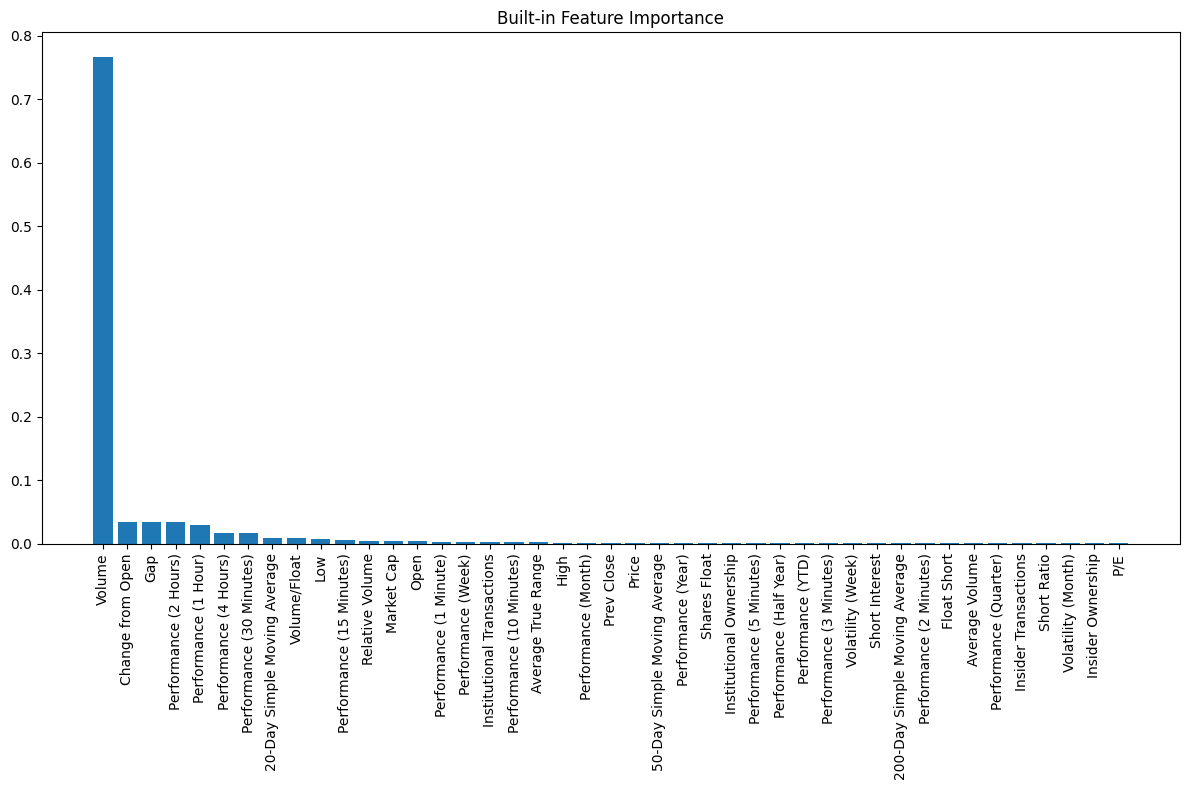

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from google.colab import drive
import glob


drive.mount('/content/drive')


def process_csv(file_path):
    df = pd.read_csv(file_path)

    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                df[col] = df[col].str.rstrip('%').astype('float') / 100.0
            except:
                pass
    return df

# Get all CSV files in the directory
csv_files = glob.glob('/content/drive/MyDrive/DS200Labs/Tuesday/*.csv')

# Process all CSV files
all_data = []
for file in csv_files:
    df = process_csv(file)
    all_data.append(df)

# Combine all data
combined_data = pd.concat(all_data, ignore_index=True)

# Print information about the dataset
print(f"Total number of rows: {len(combined_data)}")
print(f"Number of unique rows: {combined_data.drop_duplicates().shape[0]}")
print(f"Number of potential duplicates: {len(combined_data) - combined_data.drop_duplicates().shape[0]}")

# Prepare features and target
feature_columns = ['Market Cap','P/E', 'Shares Float',
       'Insider Ownership', 'Insider Transactions', 'Institutional Ownership',
       'Institutional Transactions', 'Float Short', 'Short Ratio','Short Interest',
       'Performance (1 Minute)', 'Performance (2 Minutes)',
       'Performance (3 Minutes)', 'Performance (5 Minutes)',
       'Performance (10 Minutes)', 'Performance (15 Minutes)',
       'Performance (30 Minutes)', 'Performance (1 Hour)',
       'Performance (2 Hours)', 'Performance (4 Hours)', 'Performance (Week)',
       'Performance (Month)', 'Performance (Quarter)',
       'Performance (Half Year)', 'Performance (Year)', 'Performance (YTD)',
       'Average True Range', 'Volatility (Week)', 'Volatility (Month)',
       '20-Day Simple Moving Average', '50-Day Simple Moving Average',
       '200-Day Simple Moving Average', 'Change from Open',
       'Gap', 'Average Volume', 'Relative Volume', 'Volume', 'Prev Close',
       'Open', 'High', 'Low', 'Price']


for col in feature_columns + ['Change']:
    if combined_data[col].dtype == 'object':
        combined_data[col] = pd.to_numeric(combined_data[col], errors='coerce')

# Add new feature 'Volume/Float'
combined_data['Volume/Float'] = combined_data['Volume'] / combined_data['Shares Float']
feature_columns.append('Volume/Float')

# Remove rows where 'Change' (target variable) is NaN
combined_data = combined_data.dropna(subset=['Change'])

X = combined_data[feature_columns]
y = combined_data['Change']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Calculate permutation importance
perm_importance = permutation_importance(rf, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Create and sort feature importance DataFrame
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': perm_importance.importances_mean
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Print feature importances
print("\nPermutation Importance:")
print(feature_importance)

# Visualize feature importances
plt.figure(figsize=(12, 8))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.title('Permutation Importance')
plt.tight_layout()
plt.show()

# built-in feature importances
builtin_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf.feature_importances_
})
builtin_importance = builtin_importance.sort_values('importance', ascending=False)

print("\nBuilt-in Feature Importances:")
print(builtin_importance)

plt.figure(figsize=(12, 8))
plt.bar(builtin_importance['feature'], builtin_importance['importance'])
plt.xticks(rotation=90)
plt.title('Built-in Feature Importance')
plt.tight_layout()
plt.show()


Gradient Boosting - Permutation Importance:
                          feature    importance
36                         Volume  4.951027e-01
33                            Gap  1.163116e-01
17           Performance (1 Hour)  8.853660e-02
32               Change from Open  5.787426e-02
42                   Volume/Float  5.547986e-02
35                Relative Volume  2.545516e-02
16       Performance (30 Minutes)  2.472976e-02
14       Performance (10 Minutes)  1.779964e-02
18          Performance (2 Hours)  1.701938e-02
0                      Market Cap  5.323355e-03
19          Performance (4 Hours)  3.323685e-03
40                            Low  2.556183e-03
37                     Prev Close  1.631162e-03
20             Performance (Week)  1.542261e-03
8                     Short Ratio  1.464374e-03
15       Performance (15 Minutes)  1.423393e-03
21            Performance (Month)  1.063886e-03
10         Performance (1 Minute)  1.035938e-03
22          Performance (Quarter)  7.838355

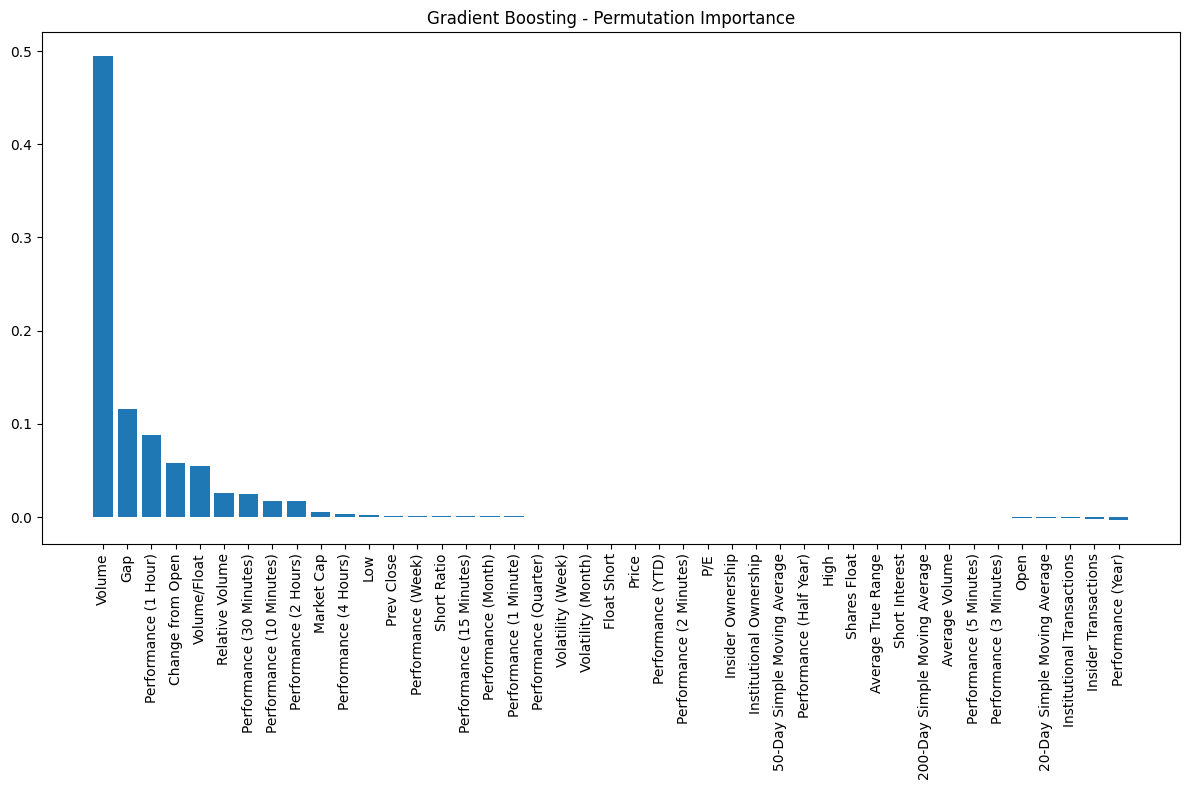


Gradient Boosting - Built-in Feature Importances:
                          feature  importance
36                         Volume    0.761194
17           Performance (1 Hour)    0.043512
33                            Gap    0.036943
18          Performance (2 Hours)    0.031410
32               Change from Open    0.030112
42                   Volume/Float    0.029483
16       Performance (30 Minutes)    0.010875
19          Performance (4 Hours)    0.010151
35                Relative Volume    0.008755
15       Performance (15 Minutes)    0.008300
29   20-Day Simple Moving Average    0.006275
41                          Price    0.002862
14       Performance (10 Minutes)    0.002758
30   50-Day Simple Moving Average    0.002177
10         Performance (1 Minute)    0.001956
40                            Low    0.001833
20             Performance (Week)    0.001497
23        Performance (Half Year)    0.001340
24             Performance (Year)    0.001288
6      Institutional Transact

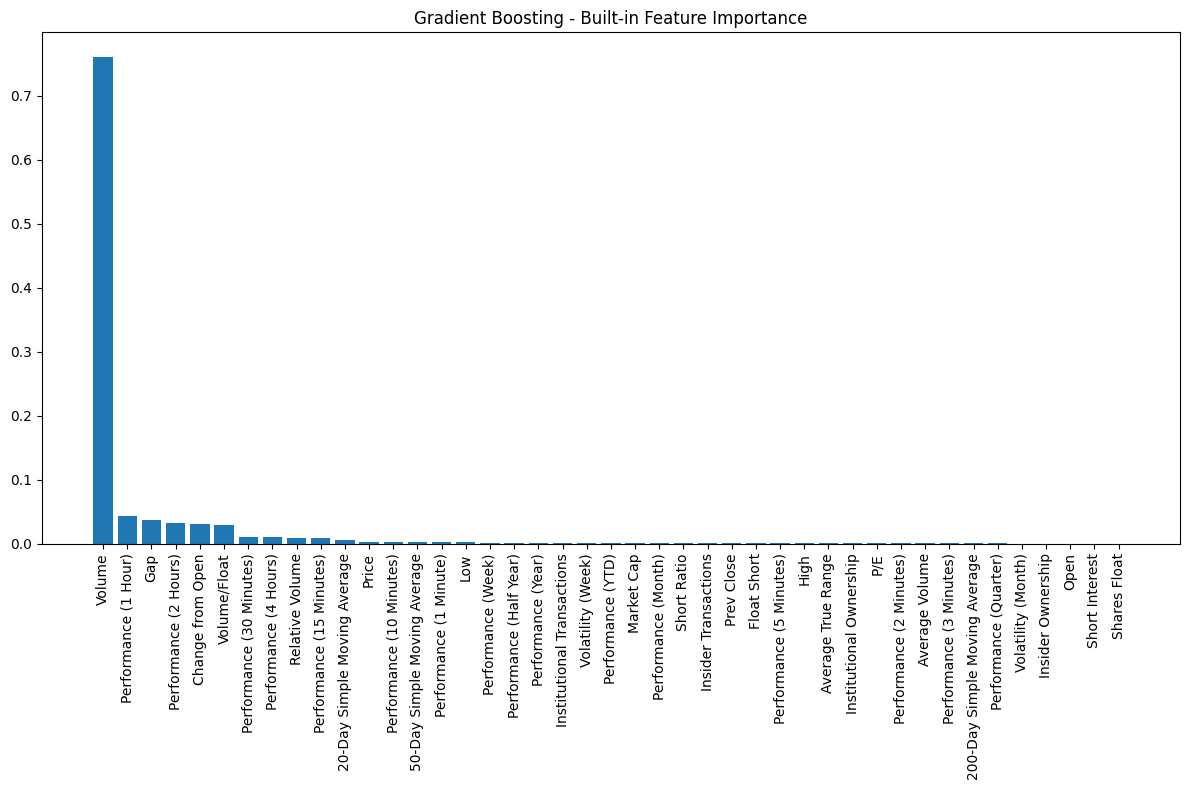

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting model
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train_scaled, y_train)

# Calculate permutation importance
gb_perm_importance = permutation_importance(gb, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Create and sort feature importance DataFrame for permutation importance
gb_feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': gb_perm_importance.importances_mean
})
gb_feature_importance = gb_feature_importance.sort_values('importance', ascending=False)

# Print Gradient Boosting permutation importances
print("\nGradient Boosting - Permutation Importance:")
print(gb_feature_importance)

# Visualize Gradient Boosting permutation importances
plt.figure(figsize=(12, 8))
plt.bar(gb_feature_importance['feature'], gb_feature_importance['importance'])
plt.xticks(rotation=90)
plt.title('Gradient Boosting - Permutation Importance')
plt.tight_layout()
plt.show()

#built-in feature importances
gb_builtin_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': gb.feature_importances_
})
gb_builtin_importance = gb_builtin_importance.sort_values('importance', ascending=False)

# Print Gradient Boosting built-in feature importances
print("\nGradient Boosting - Built-in Feature Importances:")
print(gb_builtin_importance)

# Visualize Gradient Boosting built-in feature importances
plt.figure(figsize=(12, 8))
plt.bar(gb_builtin_importance['feature'], gb_builtin_importance['importance'])
plt.xticks(rotation=90)
plt.title('Gradient Boosting - Built-in Feature Importance')
plt.tight_layout()
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 2.9 MB/s eta 0:00:00


  0%|          | 0/74 [00:00<?, ?it/s]

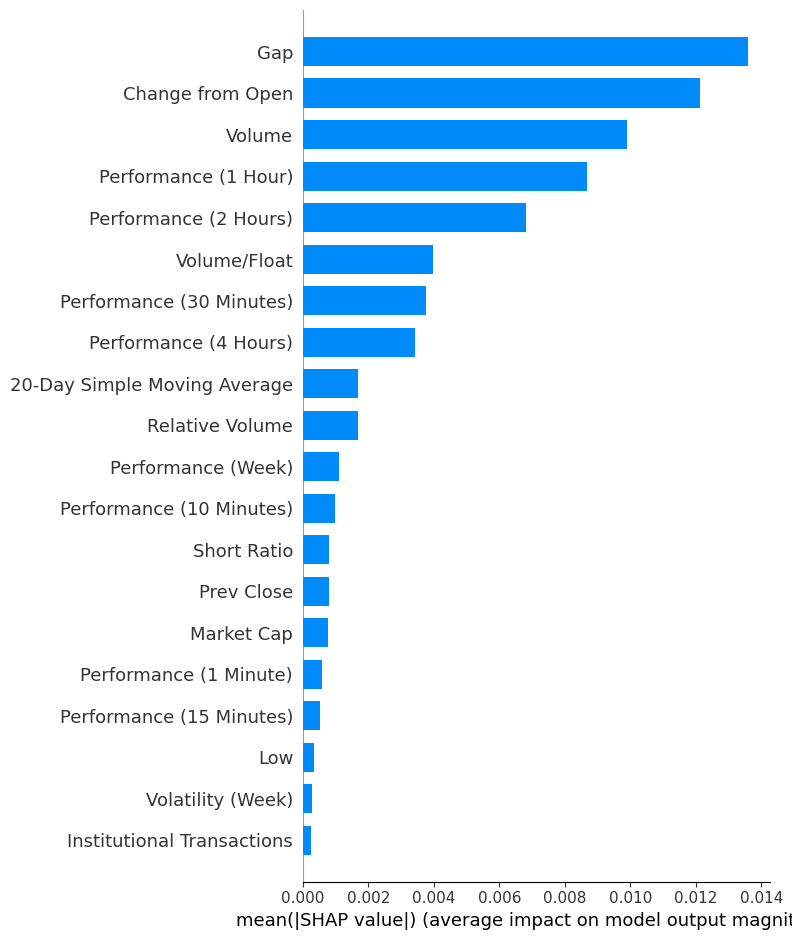

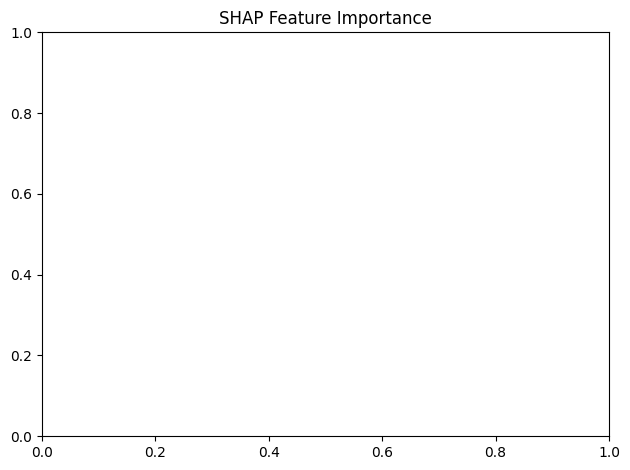

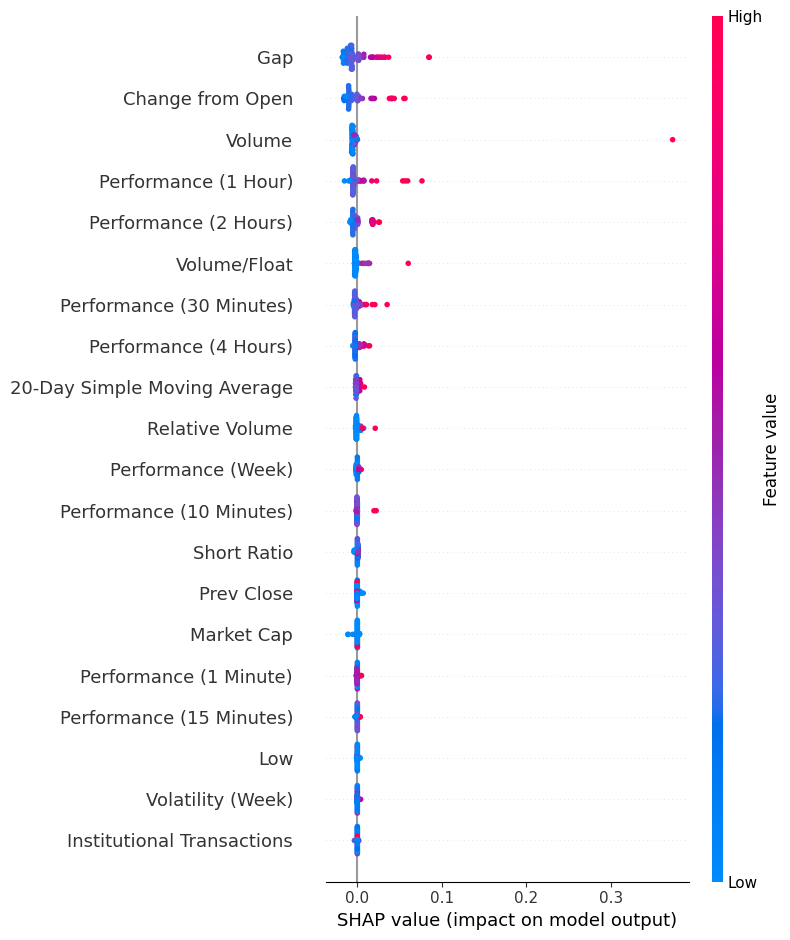

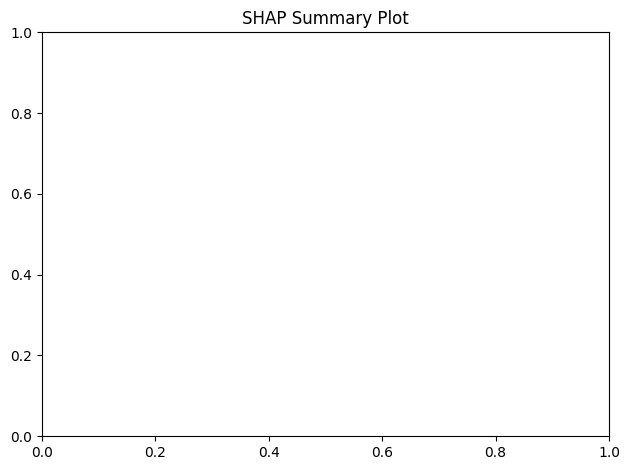

<Figure size 1200x800 with 0 Axes>

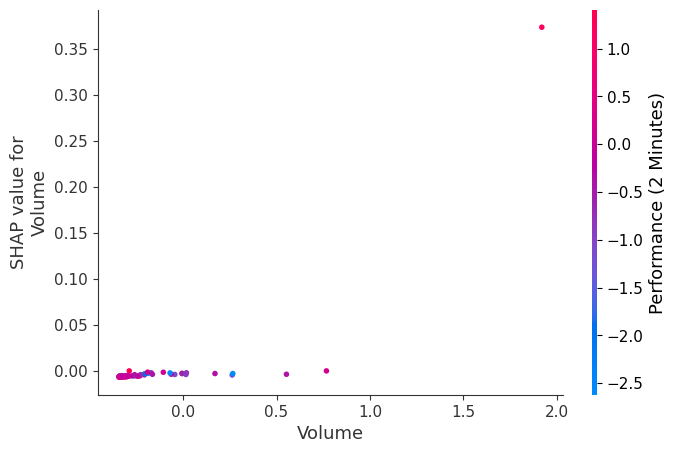

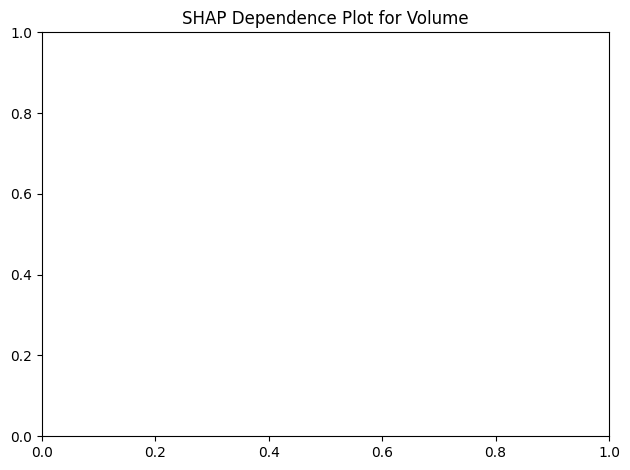

<Figure size 1200x800 with 0 Axes>

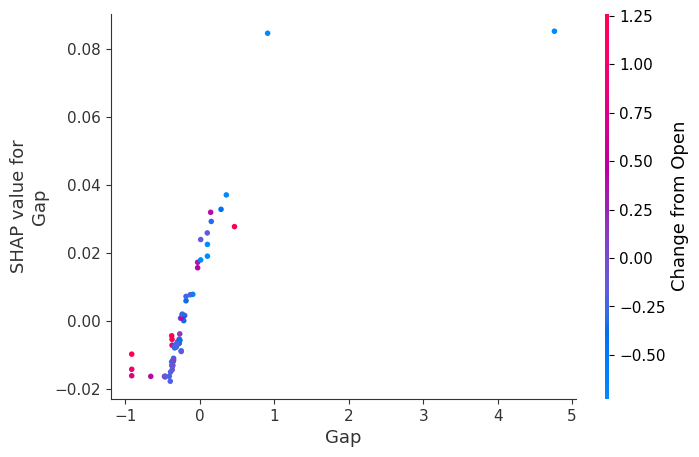

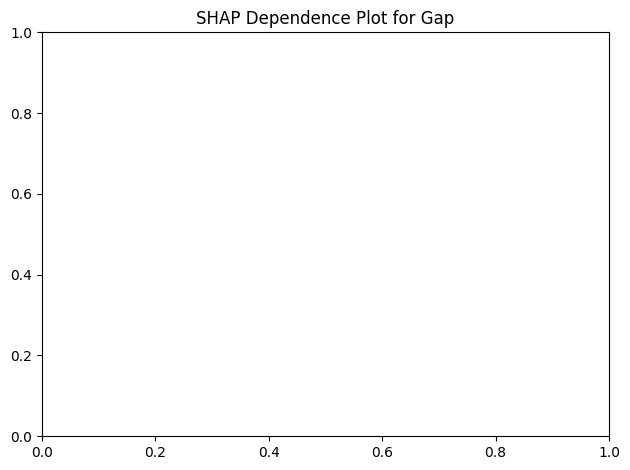

<Figure size 1200x800 with 0 Axes>

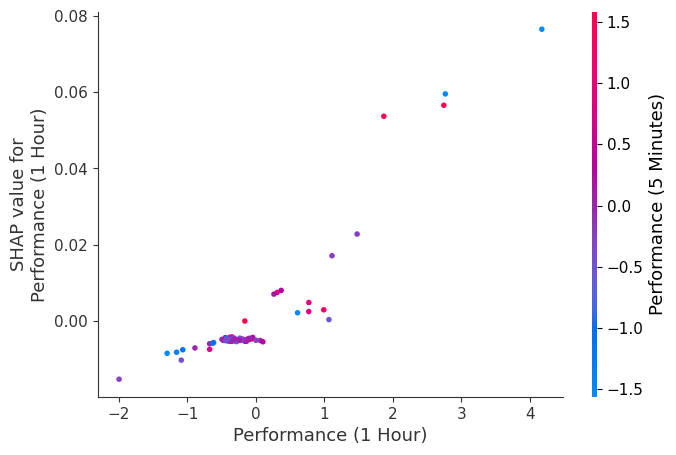

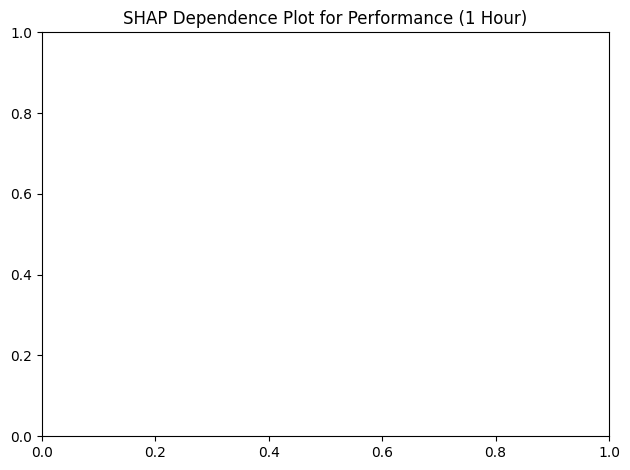

In [ ]:
!pip install shap
import shap
import matplotlib.pyplot as plt

# Create a SHAP KernelExplainer
explainer = shap.KernelExplainer(gb.predict, shap.sample(X_test_scaled, 100))

# Calculate SHAP values for a subset of the test data
shap_values = explainer.shap_values(X_test_scaled[:100], nsamples=100)

# Summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_scaled[:100], plot_type="bar", feature_names=feature_columns)
plt.title('SHAP Feature Importance')
plt.tight_layout()
plt.show()

# Detailed SHAP summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_scaled[:100], feature_names=feature_columns)
plt.title('SHAP Summary Plot')
plt.tight_layout()
plt.show()

# SHAP dependence plots for top features
top_features = gb_feature_importance['feature'].head(3).tolist()
for feature in top_features:
    plt.figure(figsize=(12, 8))
    shap.dependence_plot(feature, shap_values, X_test_scaled[:100], feature_names=feature_columns)
    plt.title(f'SHAP Dependence Plot for {feature}')
    plt.tight_layout()
    plt.show()


Feature Importances (including product features):
                                               feature  importance
910                     Average Volume*Relative Volume    0.398306
908                                          Gap*Price    0.044839
768                     Performance (Half Year)*Volume    0.026836
32                                    Change from Open    0.021690
662              Performance (2 Hours)*Relative Volume    0.017429
..                                                 ...         ...
118                                P/E*Relative Volume   -0.000988
656  Performance (2 Hours)*20-Day Simple Moving Ave...   -0.001012
753                          Performance (Quarter)*Low   -0.001015
671          Performance (4 Hours)*Performance (Month)   -0.001486
882       200-Day Simple Moving Average*Average Volume   -0.003817

[946 rows x 2 columns]


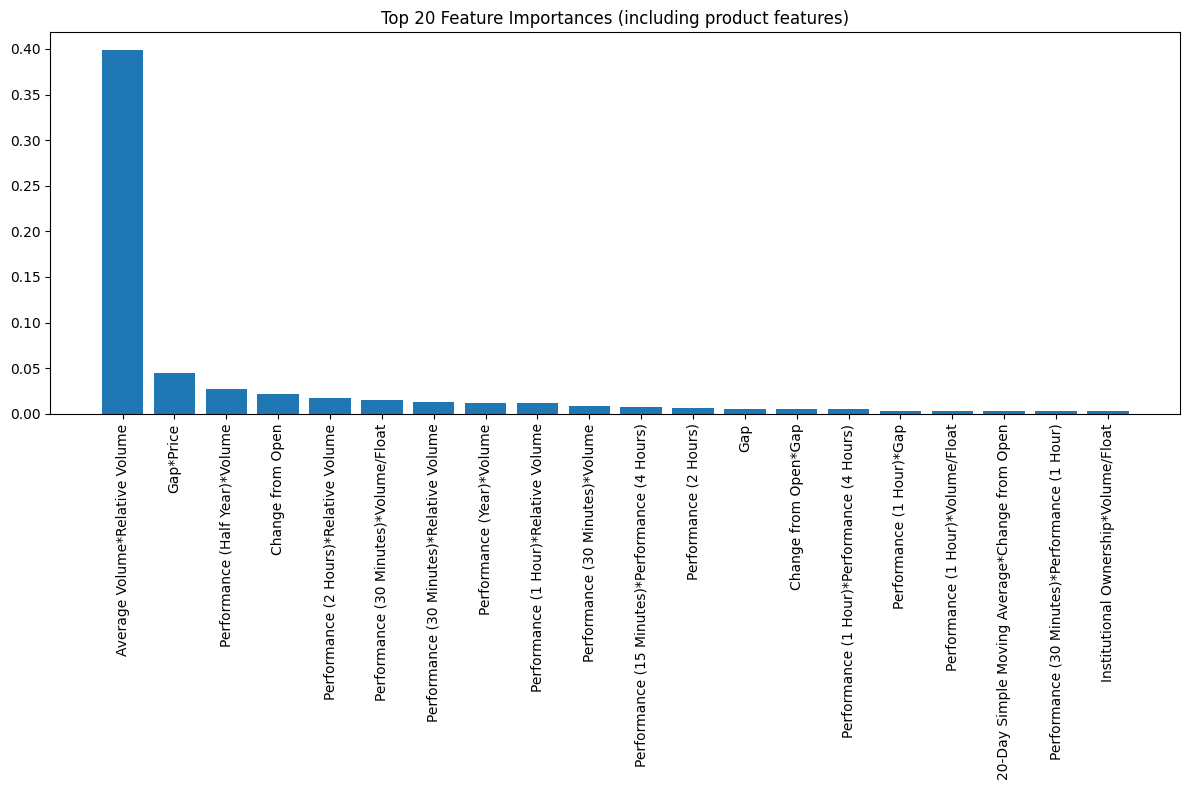

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import itertools
import shap


# Function to create product features
def create_product_features(X):
    numeric_cols = X.select_dtypes(include=[np.number]).columns
    product_features = {}
    for col1, col2 in itertools.combinations(numeric_cols, 2):
        product_features[f'{col1}*{col2}'] = X[col1] * X[col2]
    return pd.concat([X, pd.DataFrame(product_features)], axis=1)

# Create product features
X_with_products = create_product_features(X.copy())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_with_products, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Train Gradient Boosting model
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train_scaled, y_train)

# Calculate permutation importance
perm_importance = permutation_importance(gb, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Create and sort feature importance DataFrame
feature_importance = pd.DataFrame({
    'feature': X_with_products.columns,
    'importance': perm_importance.importances_mean
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Print feature importances
print("\nFeature Importances (including product features):")
print(feature_importance)

# Visualize feature importances
plt.figure(figsize=(12, 8))
plt.bar(feature_importance['feature'][:20], feature_importance['importance'][:20])
plt.xticks(rotation=90)
plt.title('Top 20 Feature Importances (including product features)')
plt.tight_layout()
plt.show()

  0%|          | 0/74 [00:00<?, ?it/s]

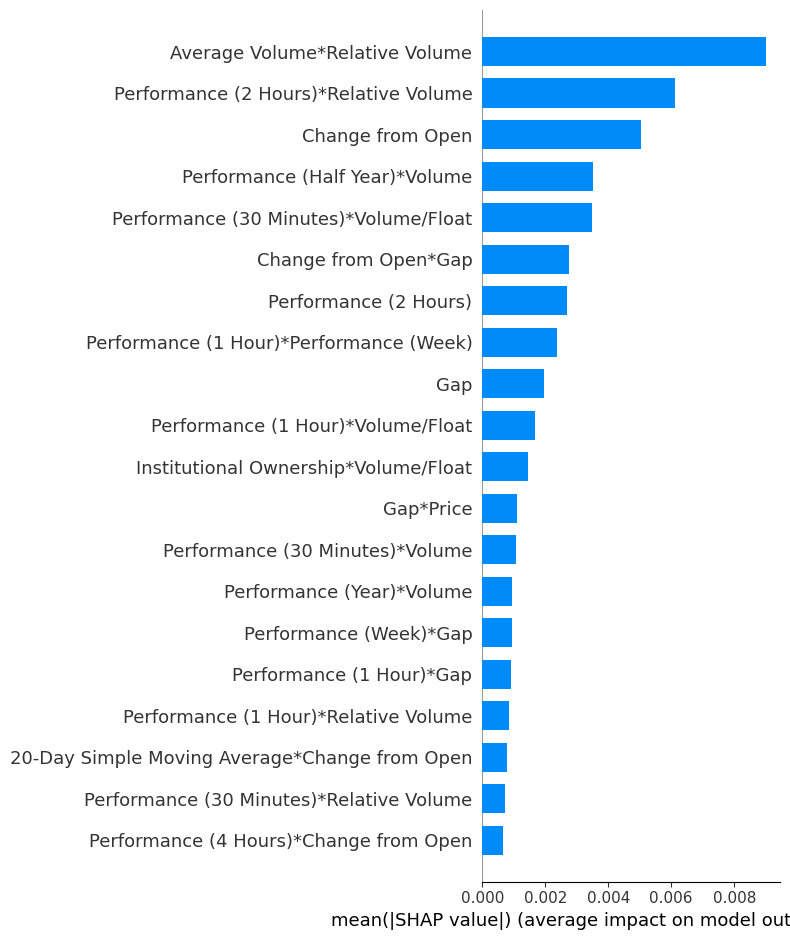

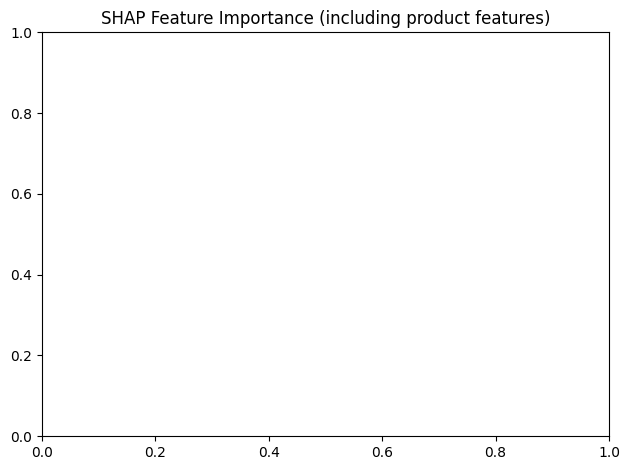

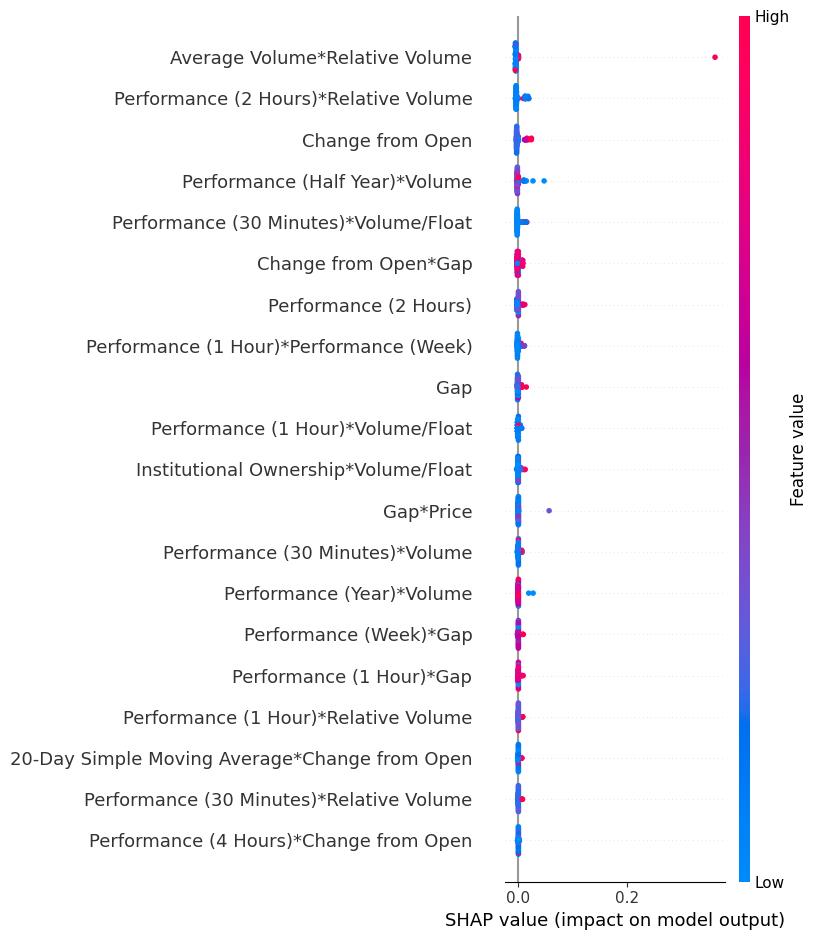

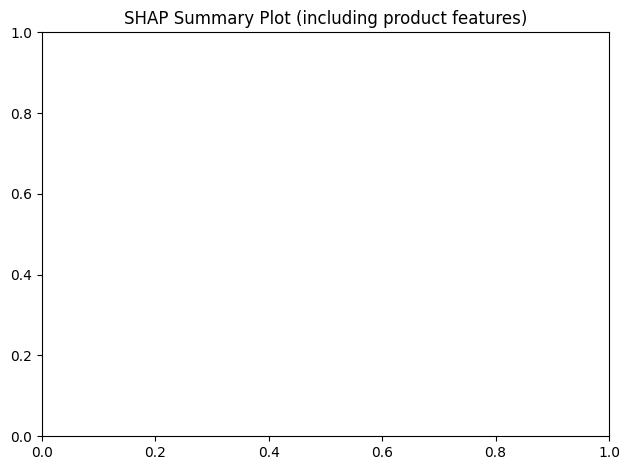

<Figure size 1200x800 with 0 Axes>

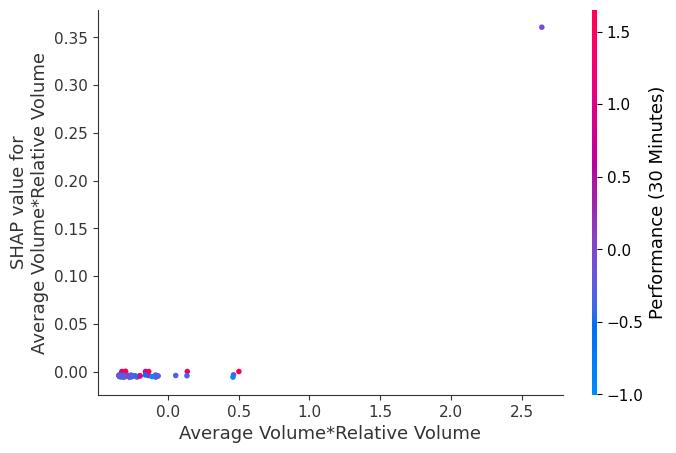

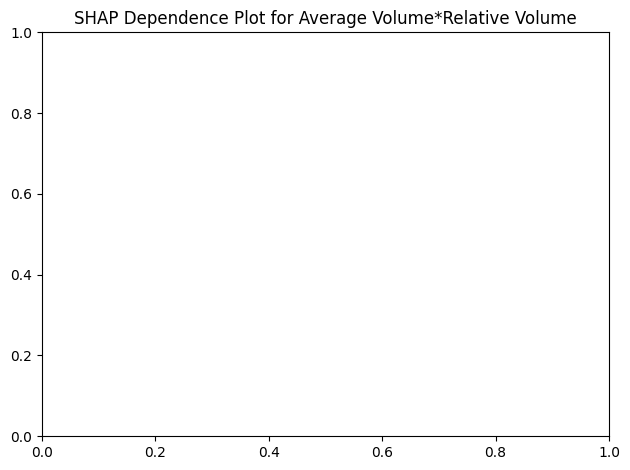

<Figure size 1200x800 with 0 Axes>

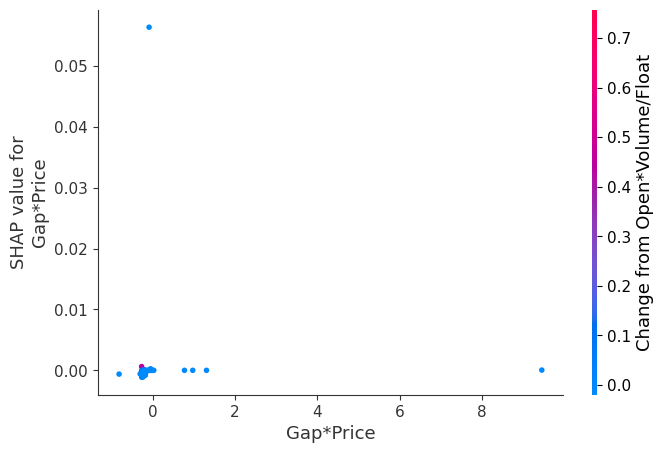

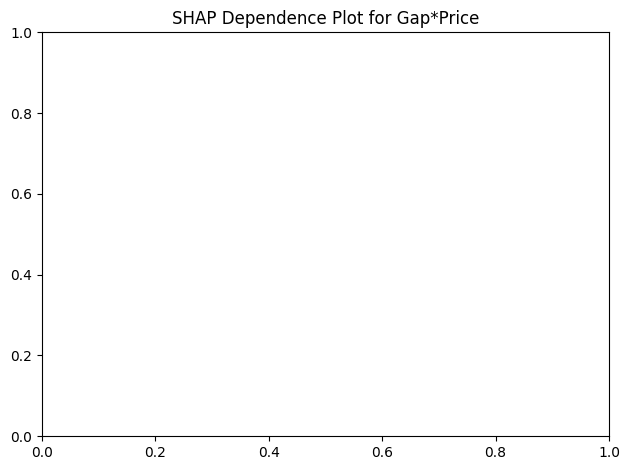

<Figure size 1200x800 with 0 Axes>

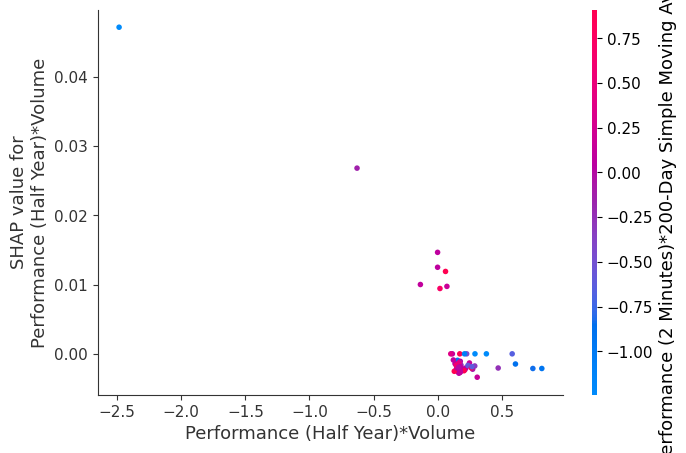

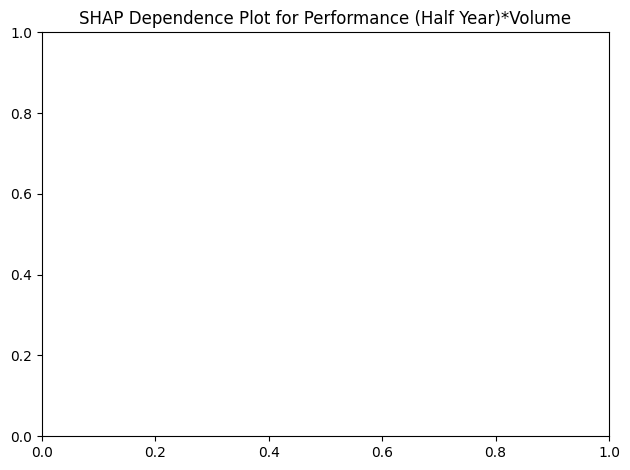

In [ ]:
# SHAP Analysis
# Create a SHAP explainer
explainer = shap.KernelExplainer(gb.predict, shap.sample(X_test_scaled, 100))

# Calculate SHAP values for a subset of the test data
shap_values = explainer.shap_values(X_test_scaled[:500], nsamples=500)

# Summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_scaled[:100], plot_type="bar", feature_names=X_with_products.columns)
plt.title('SHAP Feature Importance (including product features)')
plt.tight_layout()
plt.show()

# Detailed SHAP summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_scaled[:100], feature_names=X_with_products.columns)
plt.title('SHAP Summary Plot (including product features)')
plt.tight_layout()
plt.show()

# SHAP dependence plots for top features
top_features = feature_importance['feature'].head(3).tolist()
for feature in top_features:
    plt.figure(figsize=(12, 8))
    shap.dependence_plot(feature, shap_values, X_test_scaled[:100], feature_names=X_with_products.columns)
    plt.title(f'SHAP Dependence Plot for {feature}')
    plt.tight_layout()
    plt.show()

# 07/17/2024 Wednesday

Mounted at /content/drive
Total number of rows: 226
Number of unique rows: 226
Number of potential duplicates: 0

Permutation Importance:
                          feature  importance
35                Relative Volume    0.276937
42                   Volume/Float    0.142060
33                            Gap    0.106001
29   20-Day Simple Moving Average    0.102217
5         Institutional Ownership    0.021190
30   50-Day Simple Moving Average    0.017502
2                    Shares Float    0.005294
0                      Market Cap    0.004657
3               Insider Ownership    0.003504
27              Volatility (Week)    0.003040
41                          Price    0.002857
20             Performance (Week)    0.002089
31  200-Day Simple Moving Average    0.001860
39                           High    0.001588
22          Performance (Quarter)    0.001581
23        Performance (Half Year)    0.001082
19          Performance (4 Hours)    0.000767
21            Performance (Month) 

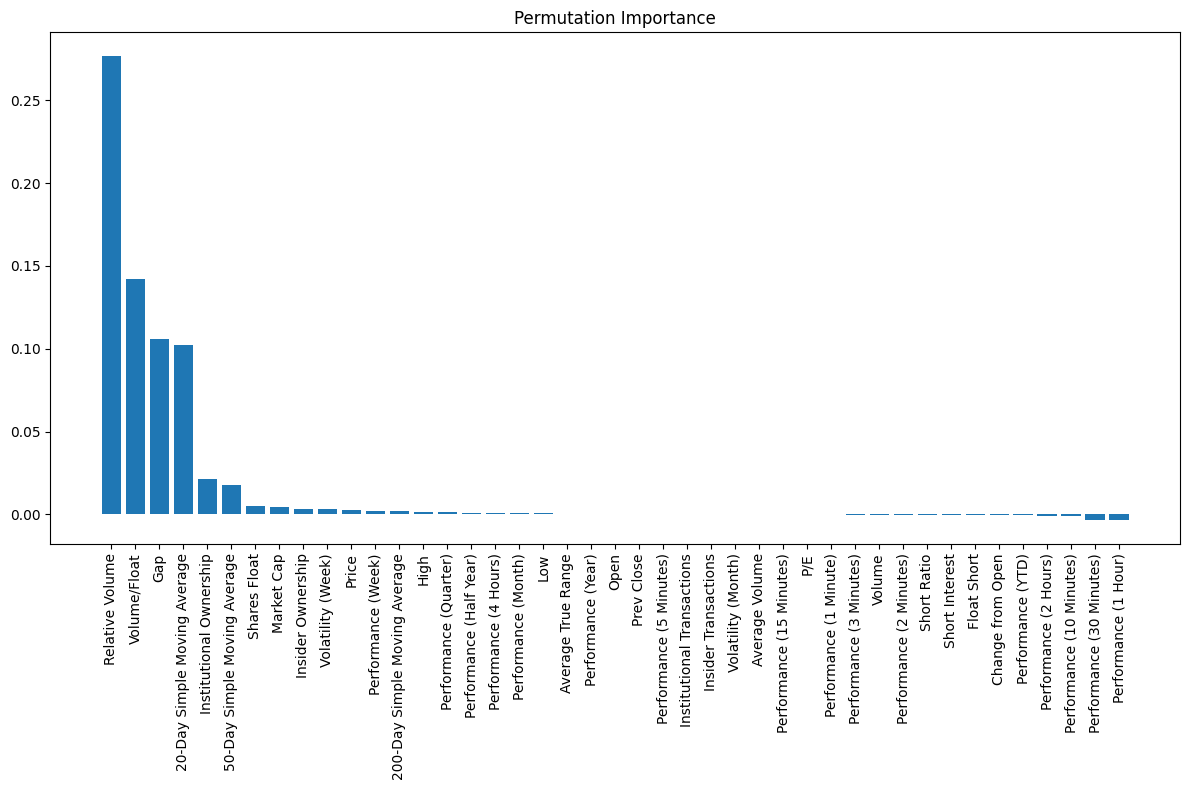


Built-in Feature Importances:
                          feature  importance
35                Relative Volume    0.289235
42                   Volume/Float    0.207557
29   20-Day Simple Moving Average    0.099699
33                            Gap    0.072308
19          Performance (4 Hours)    0.043561
5         Institutional Ownership    0.039263
30   50-Day Simple Moving Average    0.036673
17           Performance (1 Hour)    0.021835
2                    Shares Float    0.020382
32               Change from Open    0.017558
3               Insider Ownership    0.016944
18          Performance (2 Hours)    0.013258
31  200-Day Simple Moving Average    0.012417
39                           High    0.010844
34                 Average Volume    0.010775
16       Performance (30 Minutes)    0.009126
24             Performance (Year)    0.008863
41                          Price    0.007504
20             Performance (Week)    0.006636
13        Performance (5 Minutes)    0.005124
14 

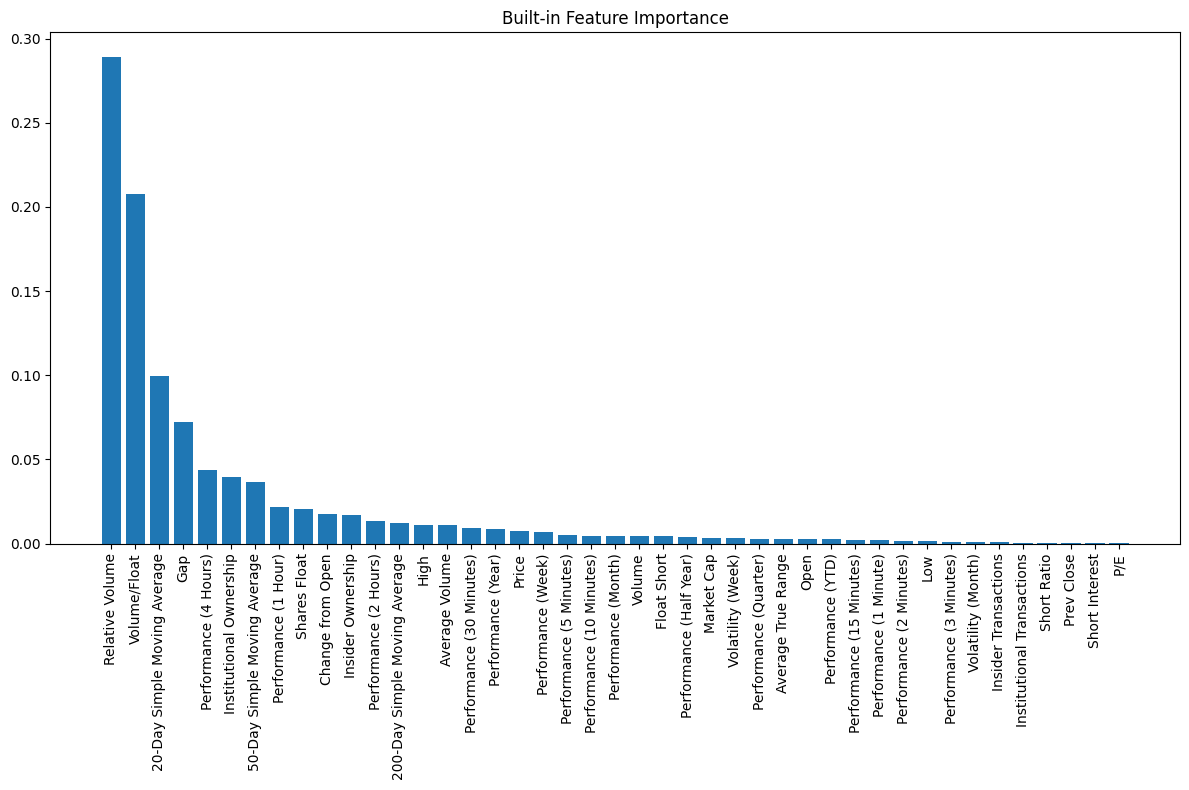

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from google.colab import drive
import glob


drive.mount('/content/drive')


def process_csv(file_path):
    df = pd.read_csv(file_path)

    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                df[col] = df[col].str.rstrip('%').astype('float') / 100.0
            except:
                pass
    return df

# Get all CSV files in the directory
csv_files = glob.glob('/content/drive/MyDrive/DS200Labs/Wednesday/*.csv')

# Process all CSV files
all_data = []
for file in csv_files:
    df = process_csv(file)
    all_data.append(df)

# Combine all data
combined_data = pd.concat(all_data, ignore_index=True)

# Print information about the dataset
print(f"Total number of rows: {len(combined_data)}")
print(f"Number of unique rows: {combined_data.drop_duplicates().shape[0]}")
print(f"Number of potential duplicates: {len(combined_data) - combined_data.drop_duplicates().shape[0]}")

# Prepare features and target
feature_columns = ['Market Cap','P/E', 'Shares Float',
       'Insider Ownership', 'Insider Transactions', 'Institutional Ownership',
       'Institutional Transactions', 'Float Short', 'Short Ratio','Short Interest',
       'Performance (1 Minute)', 'Performance (2 Minutes)',
       'Performance (3 Minutes)', 'Performance (5 Minutes)',
       'Performance (10 Minutes)', 'Performance (15 Minutes)',
       'Performance (30 Minutes)', 'Performance (1 Hour)',
       'Performance (2 Hours)', 'Performance (4 Hours)', 'Performance (Week)',
       'Performance (Month)', 'Performance (Quarter)',
       'Performance (Half Year)', 'Performance (Year)', 'Performance (YTD)',
       'Average True Range', 'Volatility (Week)', 'Volatility (Month)',
       '20-Day Simple Moving Average', '50-Day Simple Moving Average',
       '200-Day Simple Moving Average', 'Change from Open',
       'Gap', 'Average Volume', 'Relative Volume', 'Volume', 'Prev Close',
       'Open', 'High', 'Low', 'Price']


for col in feature_columns + ['Change']:
    if combined_data[col].dtype == 'object':
        combined_data[col] = pd.to_numeric(combined_data[col], errors='coerce')

# Add new feature 'Volume/Float'
combined_data['Volume/Float'] = combined_data['Volume'] / combined_data['Shares Float']
feature_columns.append('Volume/Float')

# Remove rows where 'Change' (target variable) is NaN
combined_data = combined_data.dropna(subset=['Change'])

X = combined_data[feature_columns]
y = combined_data['Change']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Calculate permutation importance
perm_importance = permutation_importance(rf, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Create and sort feature importance DataFrame
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': perm_importance.importances_mean
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Print feature importances
print("\nPermutation Importance:")
print(feature_importance)

# Visualize feature importances
plt.figure(figsize=(12, 8))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.title('Permutation Importance')
plt.tight_layout()
plt.show()

# built-in feature importances
builtin_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf.feature_importances_
})
builtin_importance = builtin_importance.sort_values('importance', ascending=False)

print("\nBuilt-in Feature Importances:")
print(builtin_importance)

plt.figure(figsize=(12, 8))
plt.bar(builtin_importance['feature'], builtin_importance['importance'])
plt.xticks(rotation=90)
plt.title('Built-in Feature Importance')
plt.tight_layout()
plt.show()


Gradient Boosting - Permutation Importance:
                          feature  importance
35                Relative Volume    0.306882
29   20-Day Simple Moving Average    0.235180
33                            Gap    0.207965
42                   Volume/Float    0.050746
30   50-Day Simple Moving Average    0.029834
5         Institutional Ownership    0.018663
32               Change from Open    0.012876
19          Performance (4 Hours)    0.006710
31  200-Day Simple Moving Average    0.004970
18          Performance (2 Hours)    0.003120
41                          Price    0.003044
21            Performance (Month)    0.001064
23        Performance (Half Year)    0.000873
14       Performance (10 Minutes)    0.000755
24             Performance (Year)    0.000723
7                     Float Short    0.000649
17           Performance (1 Hour)    0.000475
27              Volatility (Week)    0.000464
16       Performance (30 Minutes)    0.000459
25              Performance (YTD)  

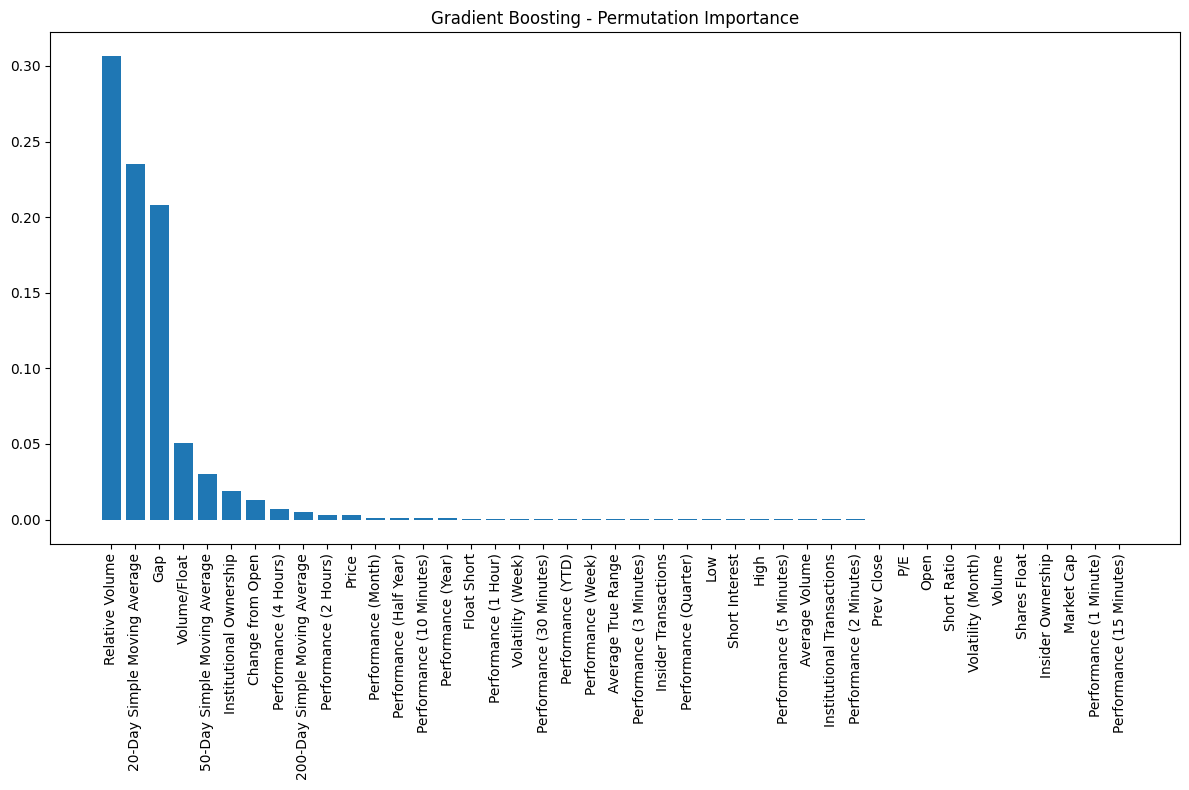


Gradient Boosting - Built-in Feature Importances:
                          feature  importance
35                Relative Volume    0.325690
42                   Volume/Float    0.177672
29   20-Day Simple Moving Average    0.125784
33                            Gap    0.079217
5         Institutional Ownership    0.059940
30   50-Day Simple Moving Average    0.057323
19          Performance (4 Hours)    0.047947
32               Change from Open    0.034945
17           Performance (1 Hour)    0.024563
31  200-Day Simple Moving Average    0.024513
18          Performance (2 Hours)    0.011139
16       Performance (30 Minutes)    0.009647
41                          Price    0.004452
13        Performance (5 Minutes)    0.003384
34                 Average Volume    0.002518
23        Performance (Half Year)    0.001101
20             Performance (Week)    0.001016
2                    Shares Float    0.000987
36                         Volume    0.000869
0                      Market

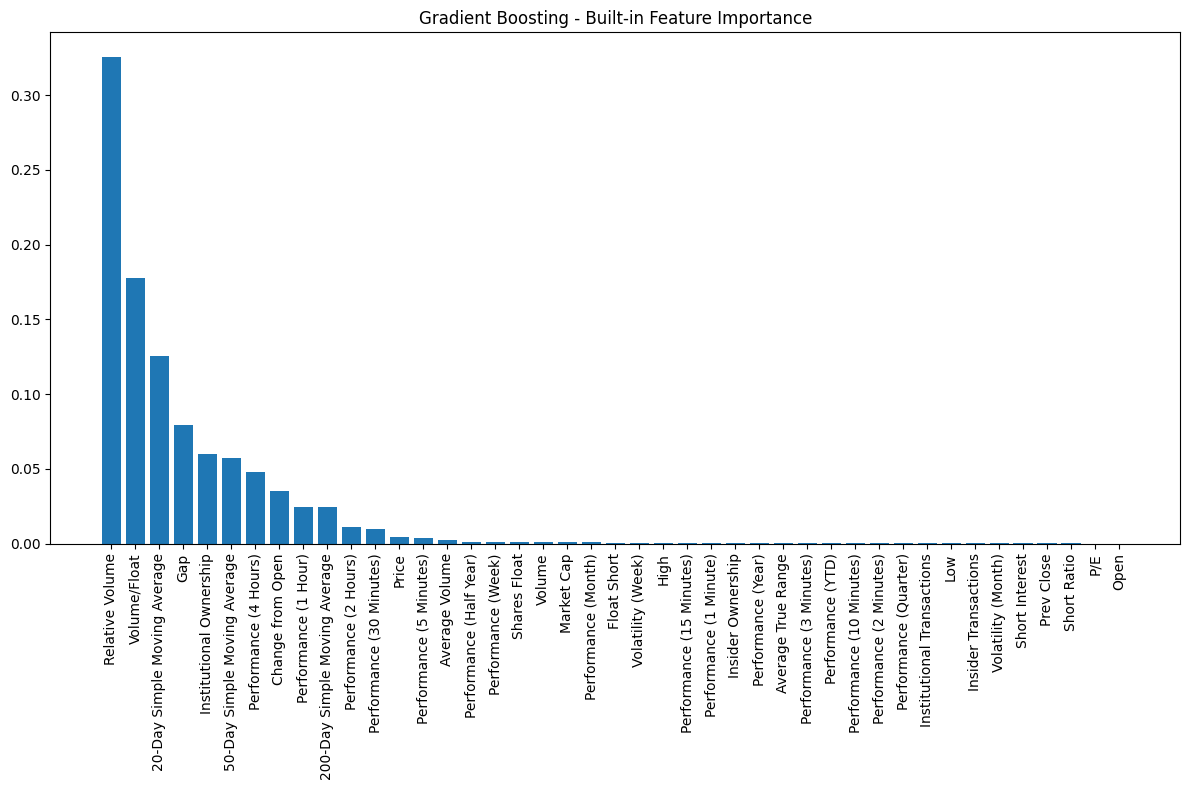

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting model
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train_scaled, y_train)

# Calculate permutation importance
gb_perm_importance = permutation_importance(gb, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Create and sort feature importance DataFrame for permutation importance
gb_feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': gb_perm_importance.importances_mean
})
gb_feature_importance = gb_feature_importance.sort_values('importance', ascending=False)

# Print Gradient Boosting permutation importances
print("\nGradient Boosting - Permutation Importance:")
print(gb_feature_importance)

# Visualize Gradient Boosting permutation importances
plt.figure(figsize=(12, 8))
plt.bar(gb_feature_importance['feature'], gb_feature_importance['importance'])
plt.xticks(rotation=90)
plt.title('Gradient Boosting - Permutation Importance')
plt.tight_layout()
plt.show()

#built-in feature importances
gb_builtin_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': gb.feature_importances_
})
gb_builtin_importance = gb_builtin_importance.sort_values('importance', ascending=False)

# Print Gradient Boosting built-in feature importances
print("\nGradient Boosting - Built-in Feature Importances:")
print(gb_builtin_importance)

# Visualize Gradient Boosting built-in feature importances
plt.figure(figsize=(12, 8))
plt.bar(gb_builtin_importance['feature'], gb_builtin_importance['importance'])
plt.xticks(rotation=90)
plt.title('Gradient Boosting - Built-in Feature Importance')
plt.tight_layout()
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 6.6 MB/s eta 0:00:00


  0%|          | 0/46 [00:00<?, ?it/s]

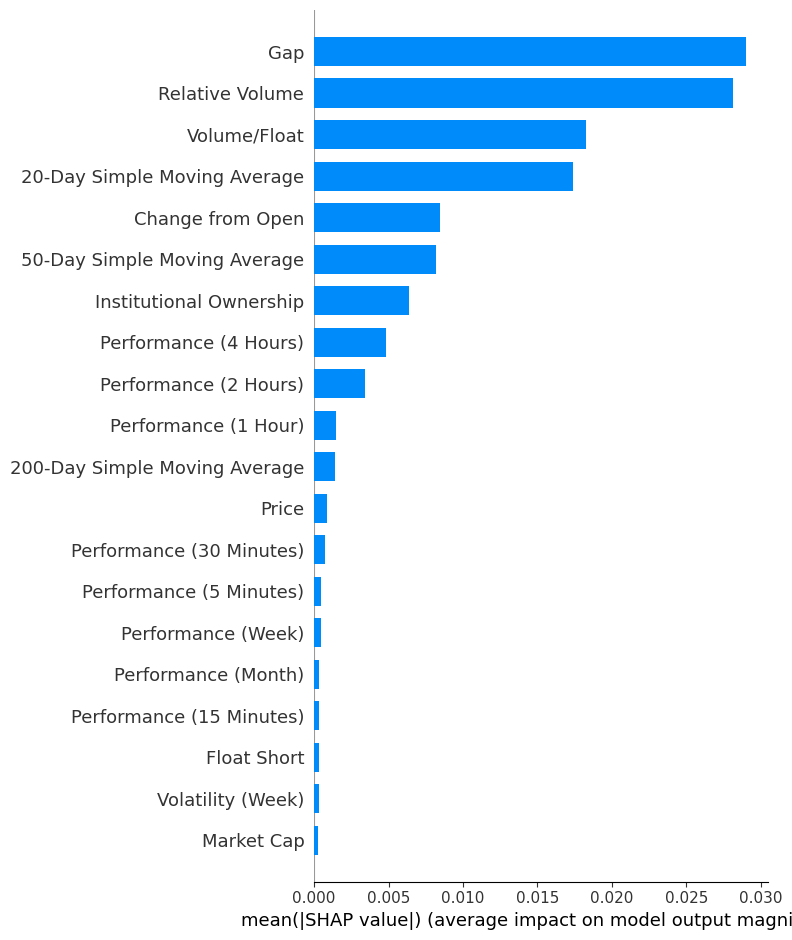

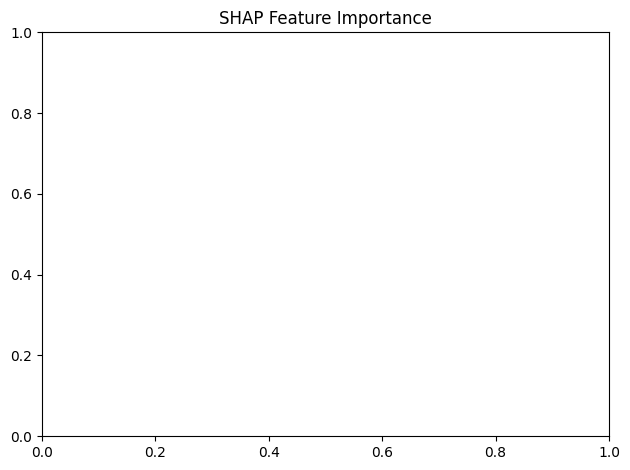

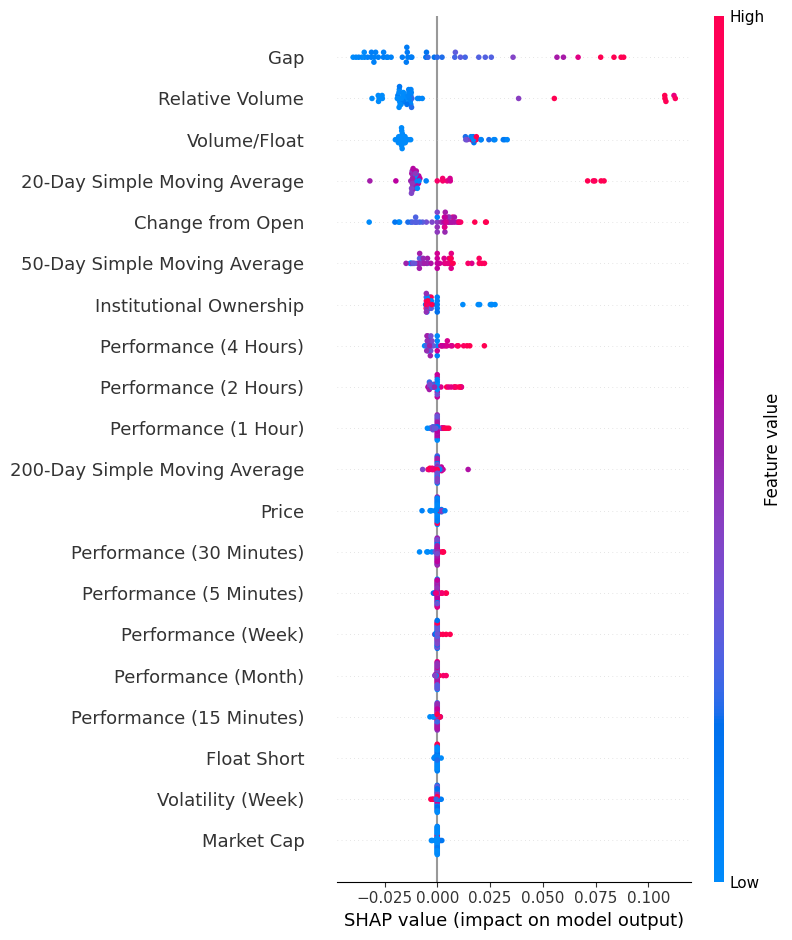

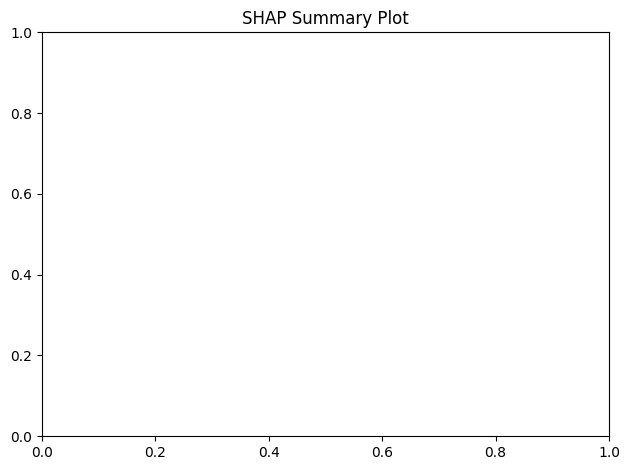

<Figure size 1200x800 with 0 Axes>

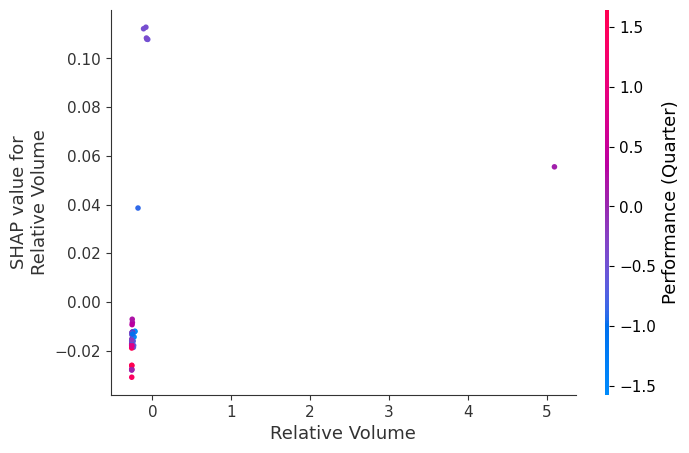

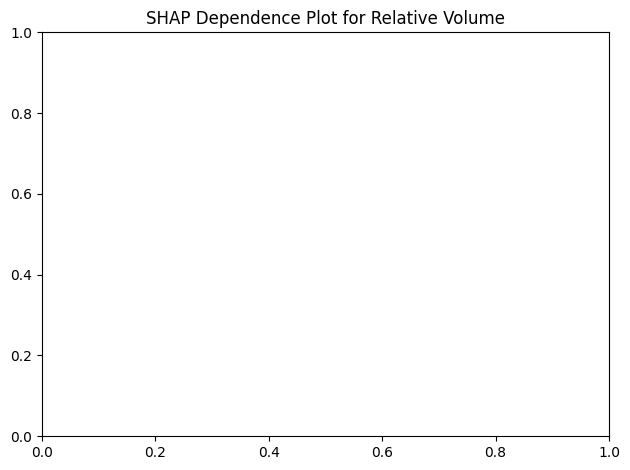

<Figure size 1200x800 with 0 Axes>

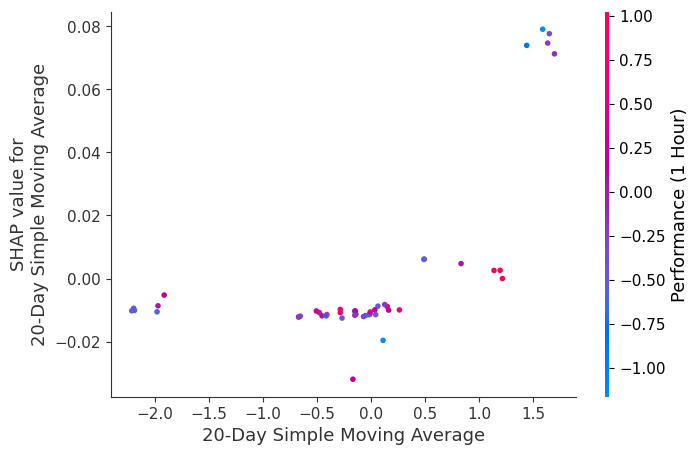

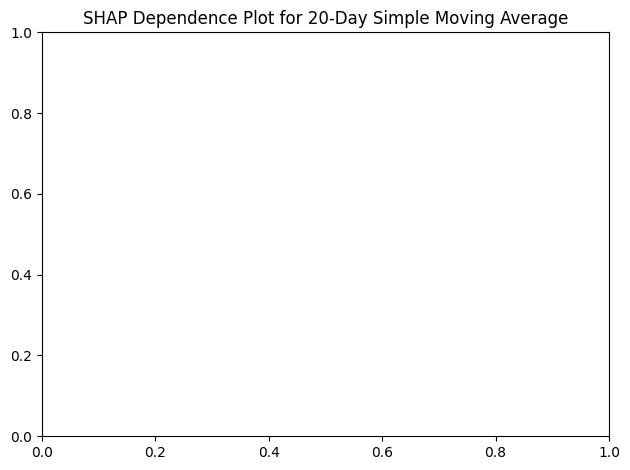

<Figure size 1200x800 with 0 Axes>

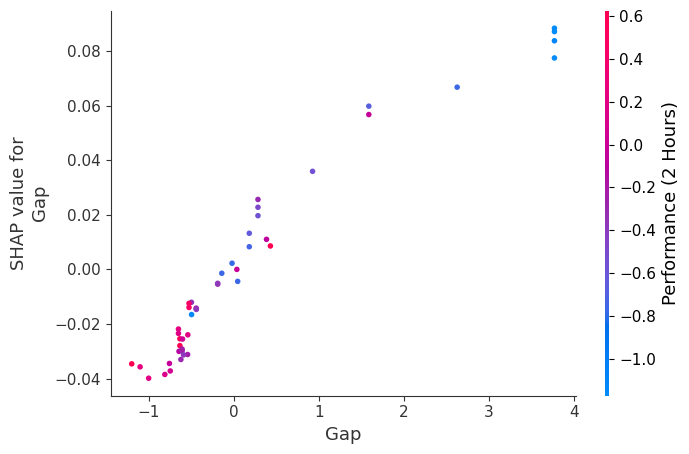

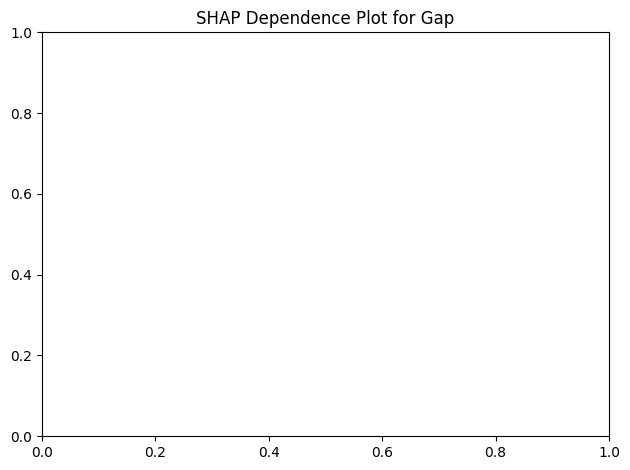

In [ ]:
!pip install shap
import shap
import matplotlib.pyplot as plt

# Create a SHAP KernelExplainer
explainer = shap.KernelExplainer(gb.predict, shap.sample(X_test_scaled, 100))

# Calculate SHAP values for a subset of the test data
shap_values = explainer.shap_values(X_test_scaled[:100], nsamples=100)

# Summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_scaled[:100], plot_type="bar", feature_names=feature_columns)
plt.title('SHAP Feature Importance')
plt.tight_layout()
plt.show()

# Detailed SHAP summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_scaled[:100], feature_names=feature_columns)
plt.title('SHAP Summary Plot')
plt.tight_layout()
plt.show()

# SHAP dependence plots for top features
top_features = gb_feature_importance['feature'].head(3).tolist()
for feature in top_features:
    plt.figure(figsize=(12, 8))
    shap.dependence_plot(feature, shap_values, X_test_scaled[:100], feature_names=feature_columns)
    plt.title(f'SHAP Dependence Plot for {feature}')
    plt.tight_layout()
    plt.show()


Feature Importances (including product features):
                                               feature  importance
879          50-Day Simple Moving Average*Volume/Float    0.212853
860       20-Day Simple Moving Average*Relative Volume    0.200912
147                    Shares Float*Performance (Year)    0.018295
695         Performance (Week)*Performance (Half Year)    0.016656
867          20-Day Simple Moving Average*Volume/Float    0.010548
..                                                 ...         ...
32                                    Change from Open   -0.000925
681  Performance (4 Hours)*200-Day Simple Moving Av...   -0.000953
909                                   Gap*Volume/Float   -0.000962
682             Performance (4 Hours)*Change from Open   -0.001188
900                      Change from Open*Volume/Float   -0.001846

[946 rows x 2 columns]


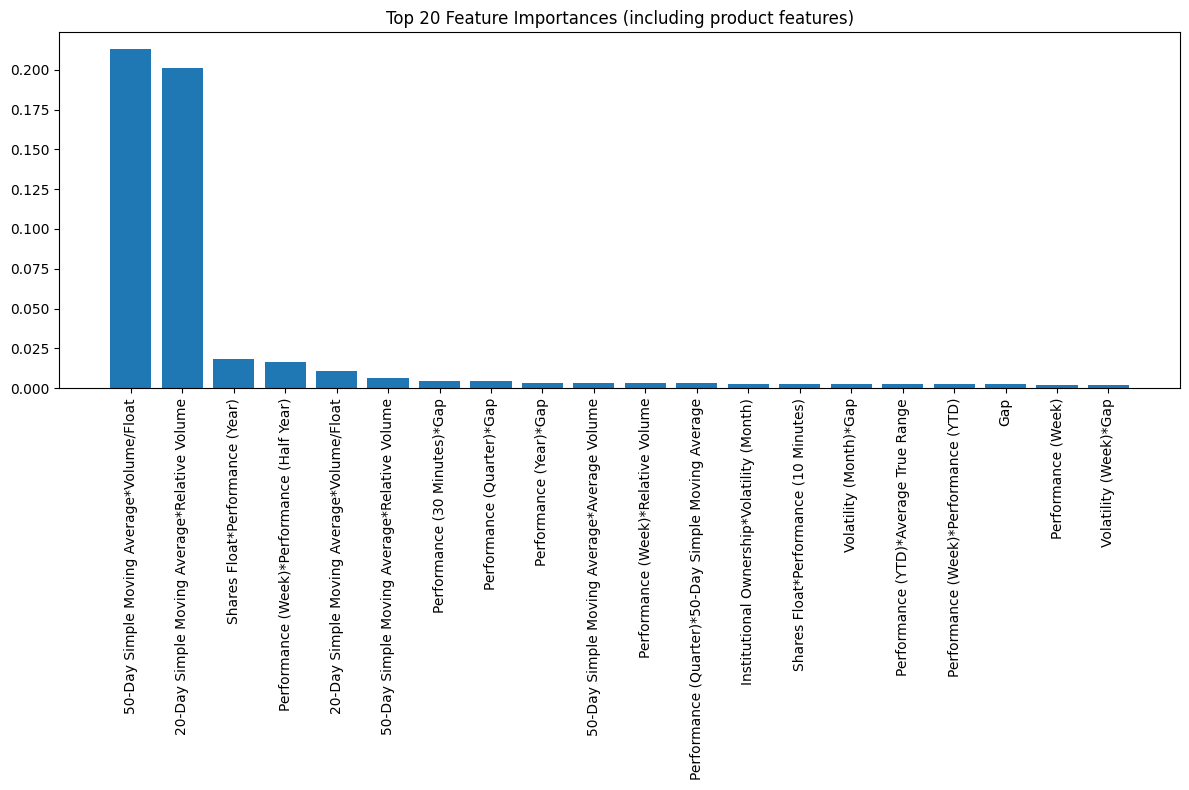

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import itertools
import shap


# Function to create product features
def create_product_features(X):
    numeric_cols = X.select_dtypes(include=[np.number]).columns
    product_features = {}
    for col1, col2 in itertools.combinations(numeric_cols, 2):
        product_features[f'{col1}*{col2}'] = X[col1] * X[col2]
    return pd.concat([X, pd.DataFrame(product_features)], axis=1)

# Create product features
X_with_products = create_product_features(X.copy())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_with_products, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Train Gradient Boosting model
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train_scaled, y_train)

# Calculate permutation importance
perm_importance = permutation_importance(gb, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Create and sort feature importance DataFrame
feature_importance = pd.DataFrame({
    'feature': X_with_products.columns,
    'importance': perm_importance.importances_mean
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Print feature importances
print("\nFeature Importances (including product features):")
print(feature_importance)

# Visualize feature importances
plt.figure(figsize=(12, 8))
plt.bar(feature_importance['feature'][:20], feature_importance['importance'][:20])
plt.xticks(rotation=90)
plt.title('Top 20 Feature Importances (including product features)')
plt.tight_layout()
plt.show()

  0%|          | 0/46 [00:00<?, ?it/s]

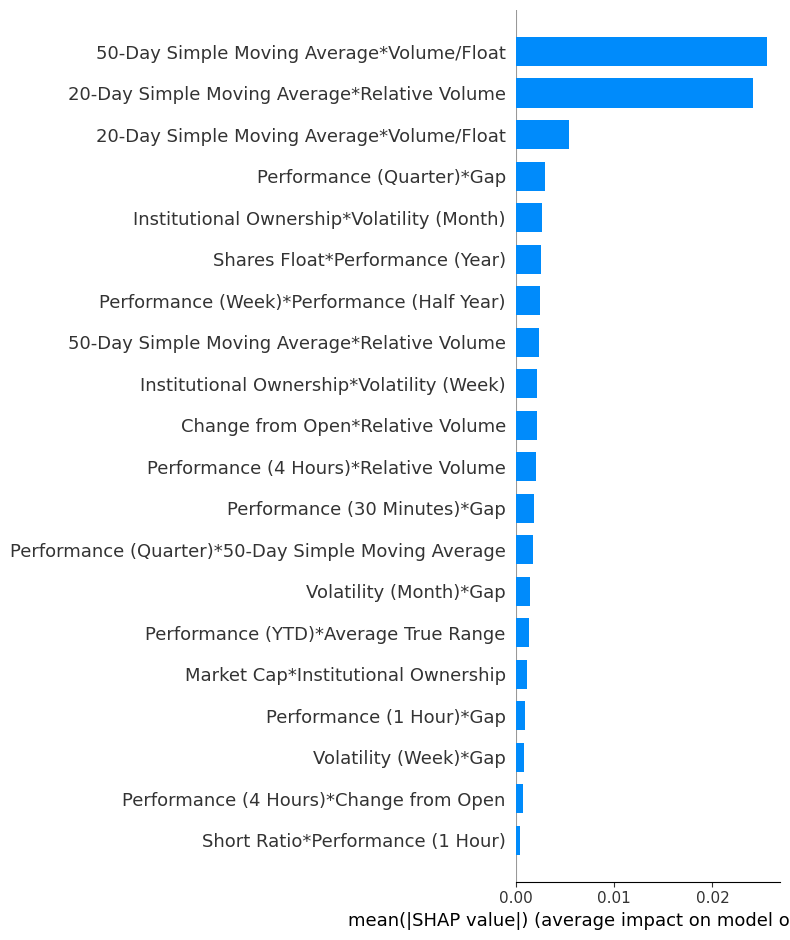

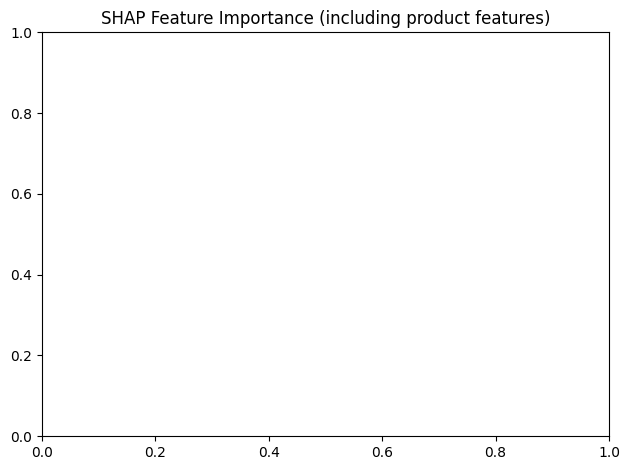

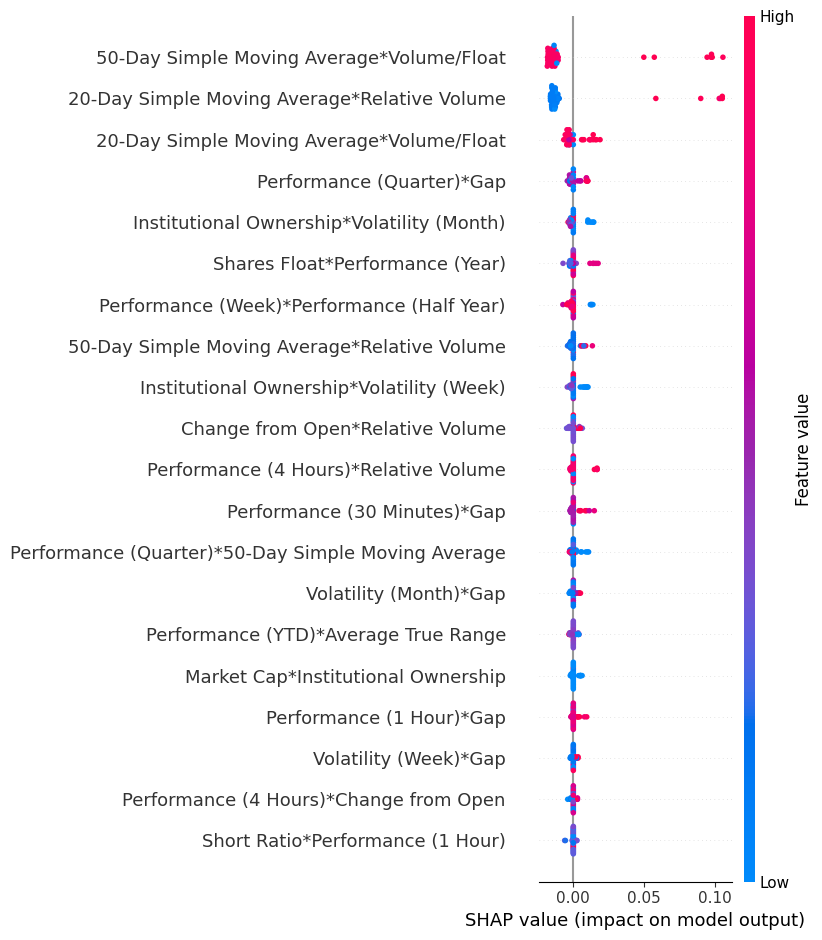

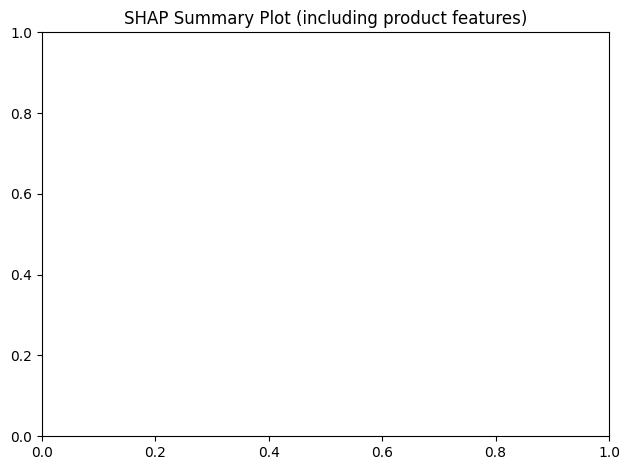

<Figure size 1200x800 with 0 Axes>

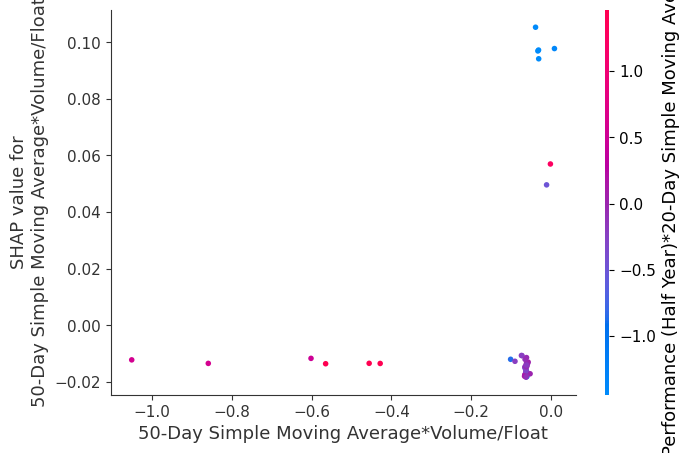

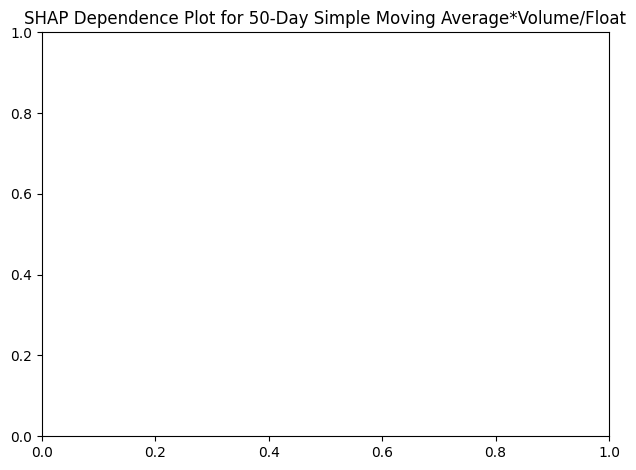

<Figure size 1200x800 with 0 Axes>

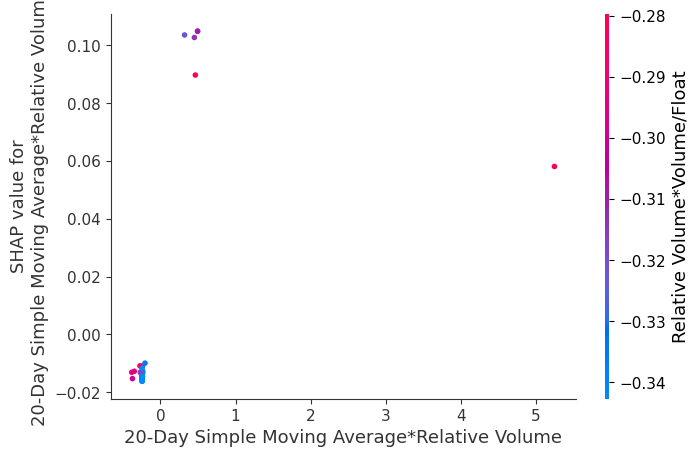

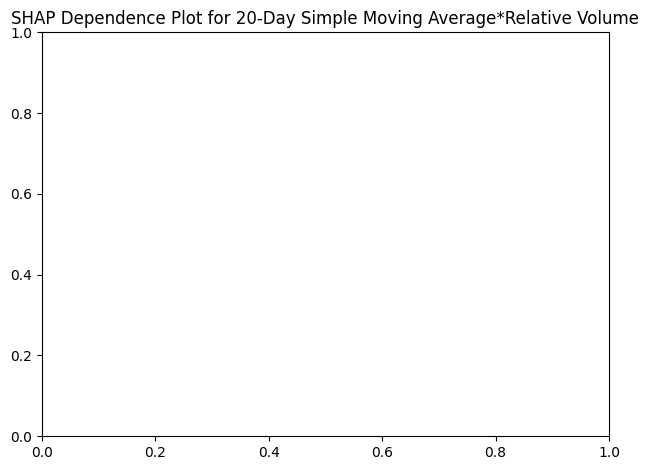

<Figure size 1200x800 with 0 Axes>

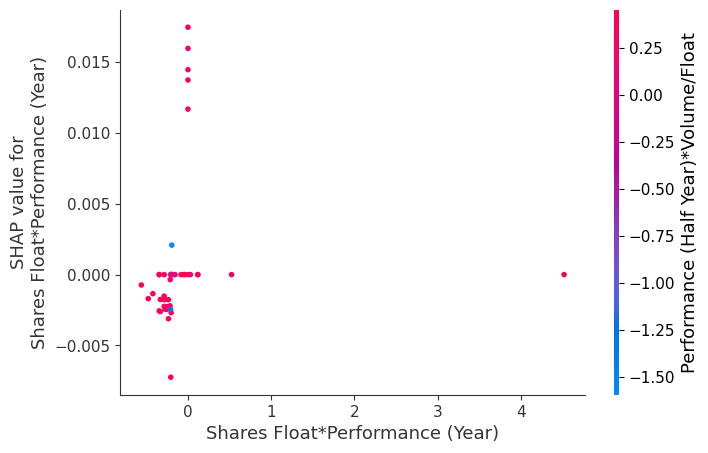

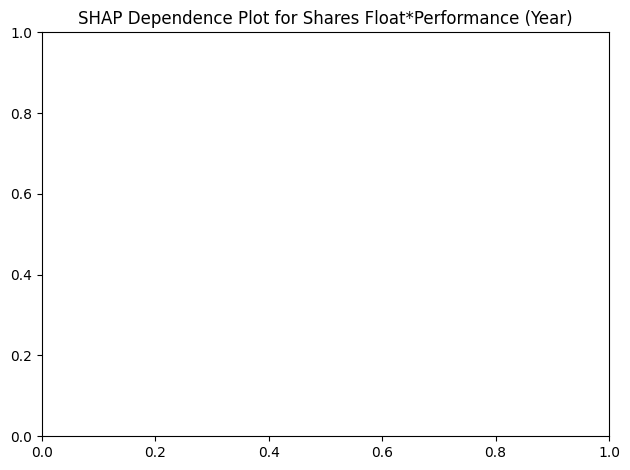

In [ ]:
# SHAP Analysis
# Create a SHAP explainer
explainer = shap.KernelExplainer(gb.predict, shap.sample(X_test_scaled, 100))

# Calculate SHAP values for a subset of the test data
shap_values = explainer.shap_values(X_test_scaled[:500], nsamples=500)

# Summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_scaled[:100], plot_type="bar", feature_names=X_with_products.columns)
plt.title('SHAP Feature Importance (including product features)')
plt.tight_layout()
plt.show()

# Detailed SHAP summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_scaled[:100], feature_names=X_with_products.columns)
plt.title('SHAP Summary Plot (including product features)')
plt.tight_layout()
plt.show()

# SHAP dependence plots for top features
top_features = feature_importance['feature'].head(3).tolist()
for feature in top_features:
    plt.figure(figsize=(12, 8))
    shap.dependence_plot(feature, shap_values, X_test_scaled[:100], feature_names=X_with_products.columns)
    plt.title(f'SHAP Dependence Plot for {feature}')
    plt.tight_layout()
    plt.show()

# 07/19/2024 Friday

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Total number of rows: 373
Number of unique rows: 373
Number of potential duplicates: 0

Permutation Importance:
                          feature  importance
31                            Gap    0.891916
18             Performance (Week)    0.045529
28   50-Day Simple Moving Average    0.010183
19            Performance (Month)    0.006396
27   20-Day Simple Moving Average    0.003906
5         Institutional Ownership    0.003879
20          Performance (Quarter)    0.003858
30               Change from Open    0.003762
17          Performance (4 Hours)    0.003731
23              Performance (YTD)    0.002417
33                Relative Volume    0.001694
25              Volatility (Week)    0.001204
39                   Volume/Float    0.000724
34                         Volume    0.000640
14       Performance (30 Minutes)    0.000604
4            Insider Tr

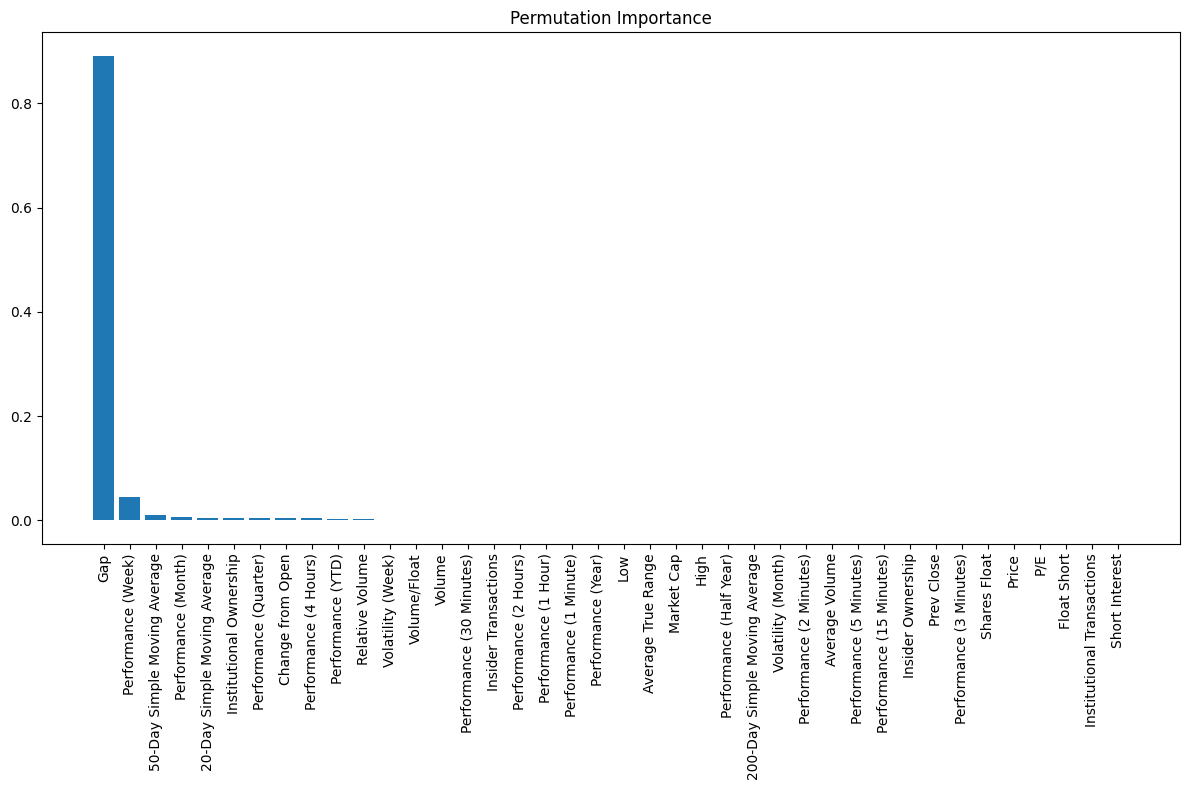


Built-in Feature Importances:
                          feature  importance
31                            Gap    0.745197
18             Performance (Week)    0.058790
28   50-Day Simple Moving Average    0.046274
19            Performance (Month)    0.026228
27   20-Day Simple Moving Average    0.022274
5         Institutional Ownership    0.021944
29  200-Day Simple Moving Average    0.007397
4            Insider Transactions    0.006081
25              Volatility (Week)    0.005662
30               Change from Open    0.005041
2                    Shares Float    0.004903
21        Performance (Half Year)    0.004853
20          Performance (Quarter)    0.004312
17          Performance (4 Hours)    0.004283
23              Performance (YTD)    0.004042
33                Relative Volume    0.003941
8                  Short Interest    0.002872
26             Volatility (Month)    0.002824
39                   Volume/Float    0.002493
15           Performance (1 Hour)    0.002229
22 

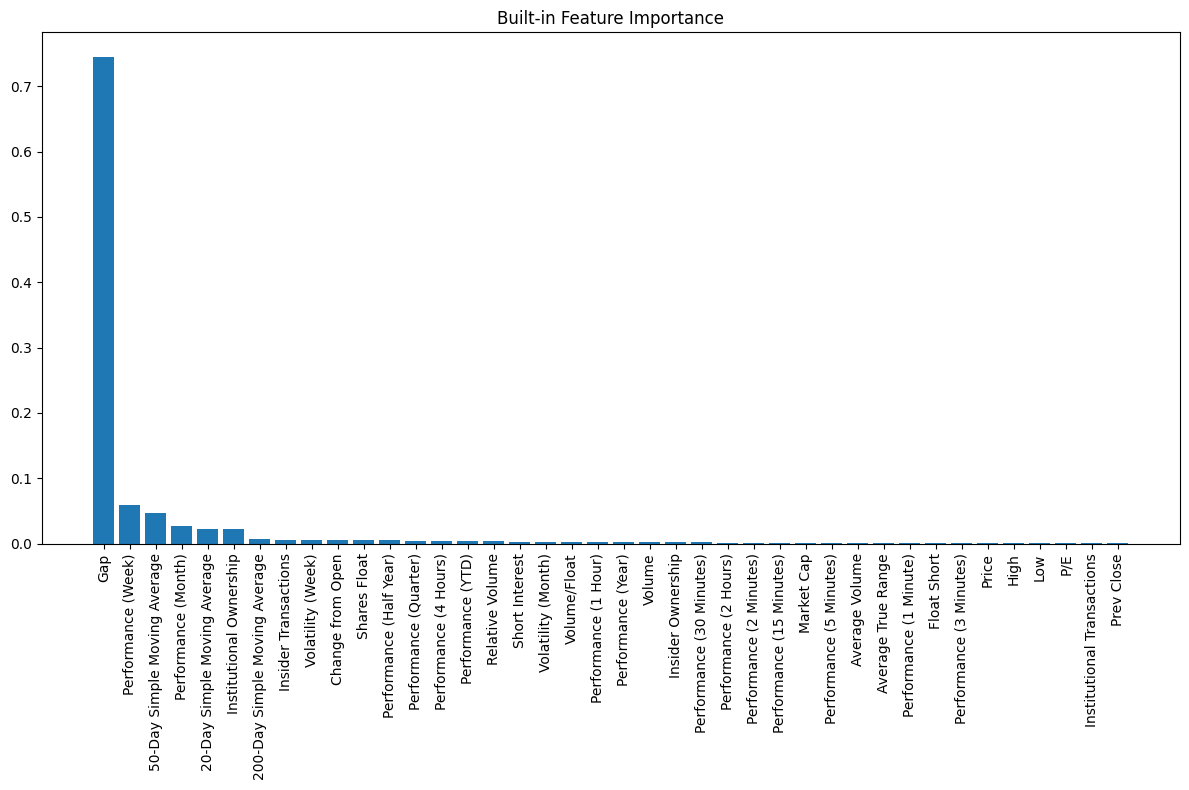

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Specify the path to your single CSV file
file_path = '/content/drive/MyDrive/DS200Labs/export_historical_final.csv'

def process_csv(file_path):
    df = pd.read_csv(file_path)

    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                df[col] = df[col].str.rstrip('%').astype('float') / 100.0
            except:
                pass
    return df

# Process the CSV file
data = process_csv(file_path)

# Print information about the dataset
print(f"Total number of rows: {len(data)}")
print(f"Number of unique rows: {data.drop_duplicates().shape[0]}")
print(f"Number of potential duplicates: {len(data) - data.drop_duplicates().shape[0]}")

# Prepare features and target
feature_columns = ['Market Cap','P/E', 'Shares Float',
       'Insider Ownership', 'Insider Transactions', 'Institutional Ownership',
       'Institutional Transactions', 'Float Short','Short Interest',
       'Performance (1 Minute)', 'Performance (2 Minutes)',
       'Performance (3 Minutes)', 'Performance (5 Minutes)',
        'Performance (15 Minutes)',
       'Performance (30 Minutes)', 'Performance (1 Hour)',
       'Performance (2 Hours)', 'Performance (4 Hours)', 'Performance (Week)',
       'Performance (Month)', 'Performance (Quarter)',
       'Performance (Half Year)', 'Performance (Year)', 'Performance (YTD)',
       'Average True Range', 'Volatility (Week)', 'Volatility (Month)',
       '20-Day Simple Moving Average', '50-Day Simple Moving Average',
       '200-Day Simple Moving Average', 'Change from Open',
       'Gap', 'Average Volume', 'Relative Volume', 'Volume', 'Prev Close',
      'High', 'Low', 'Price']

for col in feature_columns + ['Change']:
    if data[col].dtype == 'object':
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Add new feature 'Volume/Float'
data['Volume/Float'] = data['Volume'] / data['Shares Float']
feature_columns.append('Volume/Float')

# Remove rows where 'Change' (target variable) is NaN
data = data.dropna(subset=['Change'])

X = data[feature_columns]
y = data['Change']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Calculate permutation importance
perm_importance = permutation_importance(rf, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Create and sort feature importance DataFrame
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': perm_importance.importances_mean
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Print feature importances
print("\nPermutation Importance:")
print(feature_importance)

# Visualize feature importances
plt.figure(figsize=(12, 8))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.title('Permutation Importance')
plt.tight_layout()
plt.show()

# built-in feature importances
builtin_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf.feature_importances_
})
builtin_importance = builtin_importance.sort_values('importance', ascending=False)

print("\nBuilt-in Feature Importances:")
print(builtin_importance)

plt.figure(figsize=(12, 8))
plt.bar(builtin_importance['feature'], builtin_importance['importance'])
plt.xticks(rotation=90)
plt.title('Built-in Feature Importance')
plt.tight_layout()
plt.show()


Gradient Boosting - Permutation Importance:
                          feature  importance
31                            Gap    0.863458
18             Performance (Week)    0.039815
28   50-Day Simple Moving Average    0.024478
17          Performance (4 Hours)    0.011546
30               Change from Open    0.010407
27   20-Day Simple Moving Average    0.008579
19            Performance (Month)    0.004941
5         Institutional Ownership    0.002780
20          Performance (Quarter)    0.002668
33                Relative Volume    0.001976
0                      Market Cap    0.001132
37                            Low    0.000947
15           Performance (1 Hour)    0.000731
25              Volatility (Week)    0.000288
36                           High    0.000287
16          Performance (2 Hours)    0.000277
11        Performance (3 Minutes)    0.000256
39                   Volume/Float    0.000215
22             Performance (Year)    0.000213
23              Performance (YTD)  

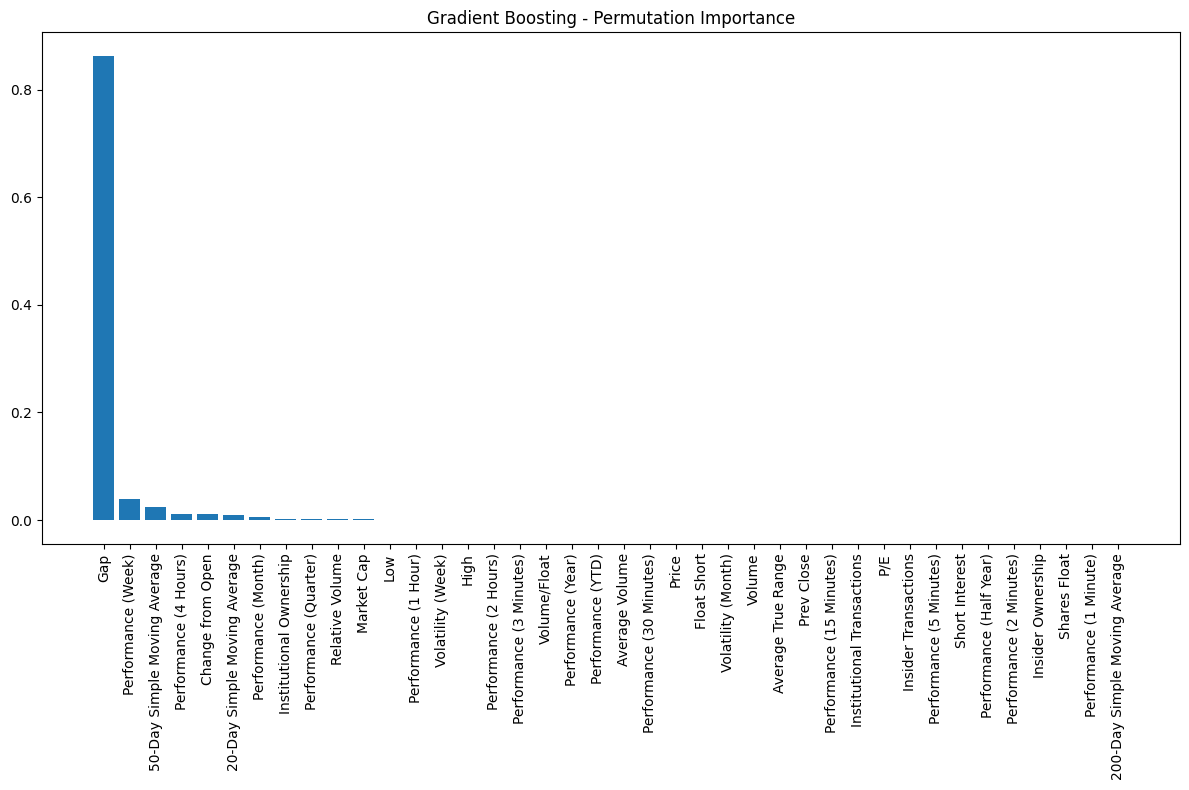


Gradient Boosting - Built-in Feature Importances:
                          feature    importance
31                            Gap  7.413559e-01
18             Performance (Week)  5.187486e-02
27   20-Day Simple Moving Average  4.614434e-02
19            Performance (Month)  4.274104e-02
28   50-Day Simple Moving Average  2.919425e-02
20          Performance (Quarter)  2.029748e-02
5         Institutional Ownership  1.787697e-02
17          Performance (4 Hours)  1.388289e-02
30               Change from Open  6.747325e-03
33                Relative Volume  4.682199e-03
15           Performance (1 Hour)  4.433522e-03
26             Volatility (Month)  2.563207e-03
16          Performance (2 Hours)  2.416964e-03
23              Performance (YTD)  2.383508e-03
13       Performance (15 Minutes)  2.078236e-03
29  200-Day Simple Moving Average  1.836973e-03
0                      Market Cap  1.563902e-03
34                         Volume  1.351261e-03
37                            Low  1.

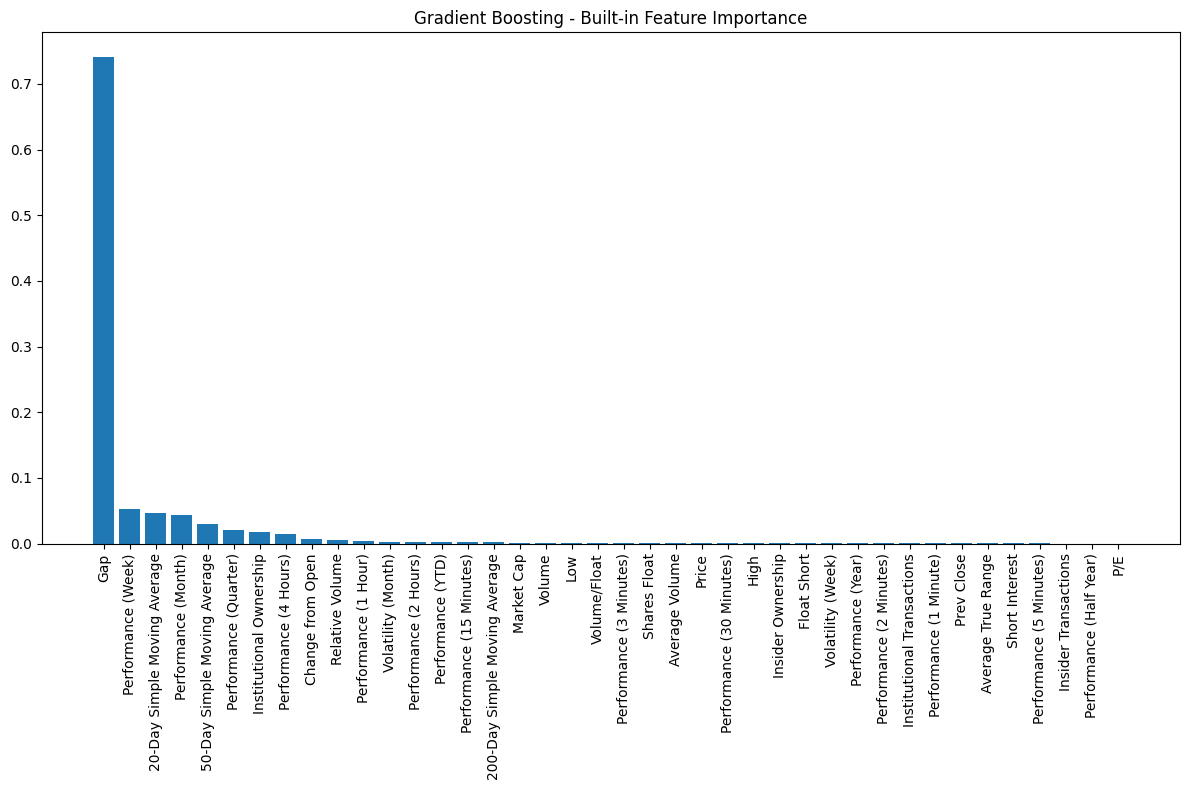

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from google.colab import drive

# Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train_scaled, y_train)

gb_perm_importance = permutation_importance(gb, X_test_scaled, y_test, n_repeats=10, random_state=42)
gb_feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': gb_perm_importance.importances_mean
}).sort_values('importance', ascending=False)

print("\nGradient Boosting - Permutation Importance:")
print(gb_feature_importance)

plt.figure(figsize=(12, 8))
plt.bar(gb_feature_importance['feature'], gb_feature_importance['importance'])
plt.xticks(rotation=90)
plt.title('Gradient Boosting - Permutation Importance')
plt.tight_layout()
plt.show()

gb_builtin_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': gb.feature_importances_
}).sort_values('importance', ascending=False)

print("\nGradient Boosting - Built-in Feature Importances:")
print(gb_builtin_importance)

plt.figure(figsize=(12, 8))
plt.bar(gb_builtin_importance['feature'], gb_builtin_importance['importance'])
plt.xticks(rotation=90)
plt.title('Gradient Boosting - Built-in Feature Importance')
plt.tight_layout()
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 4.1 MB/s eta 0:00:00


  0%|          | 0/75 [00:00<?, ?it/s]

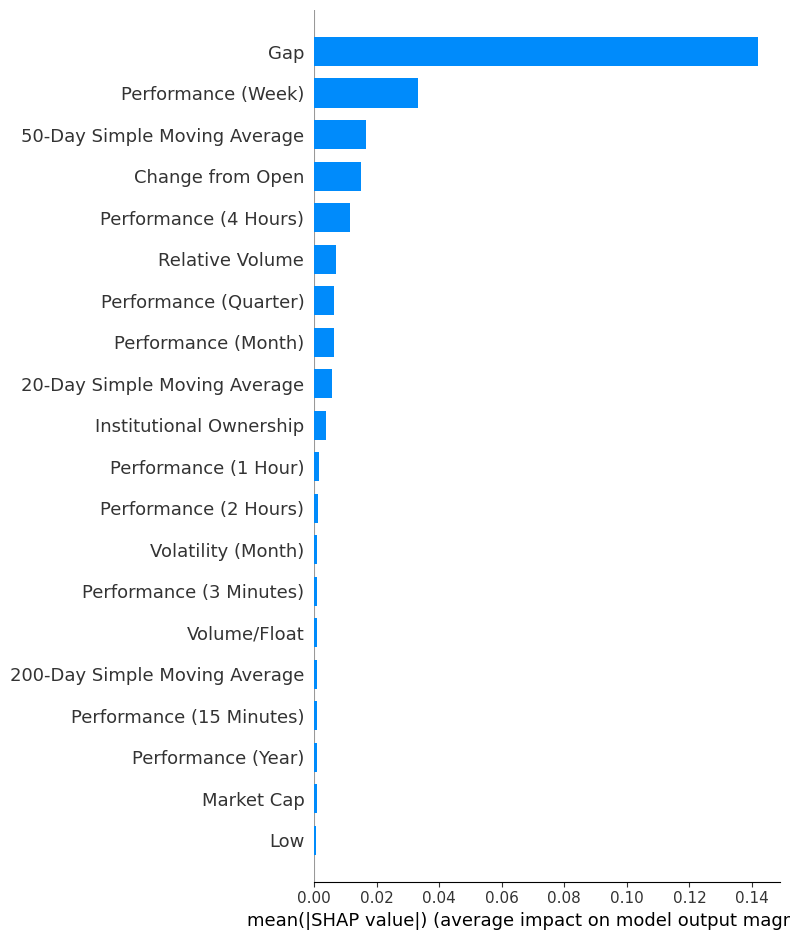

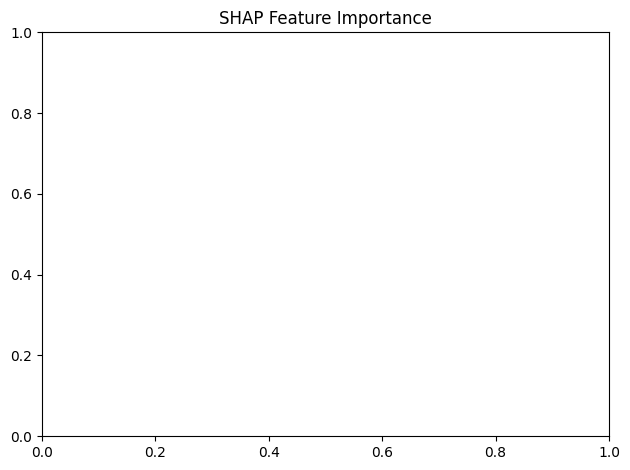

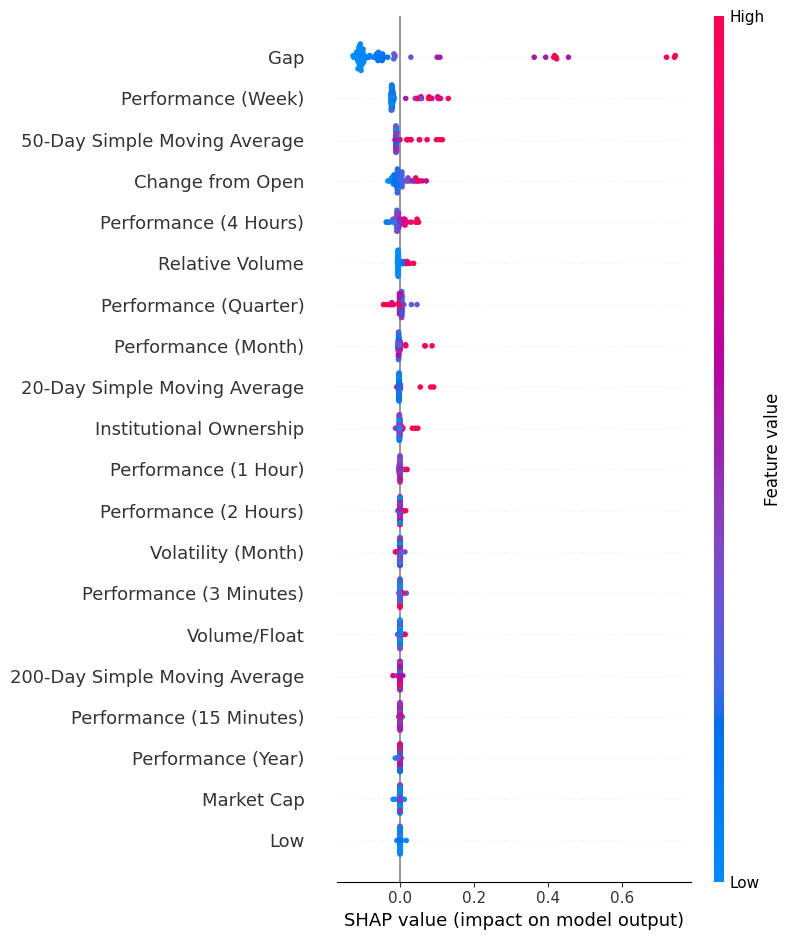

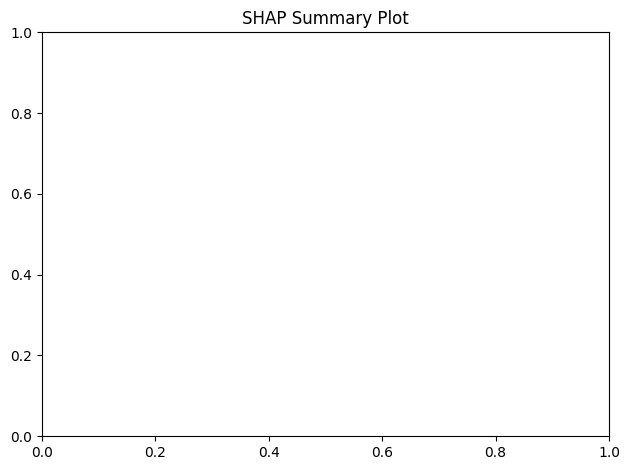

<Figure size 1200x800 with 0 Axes>

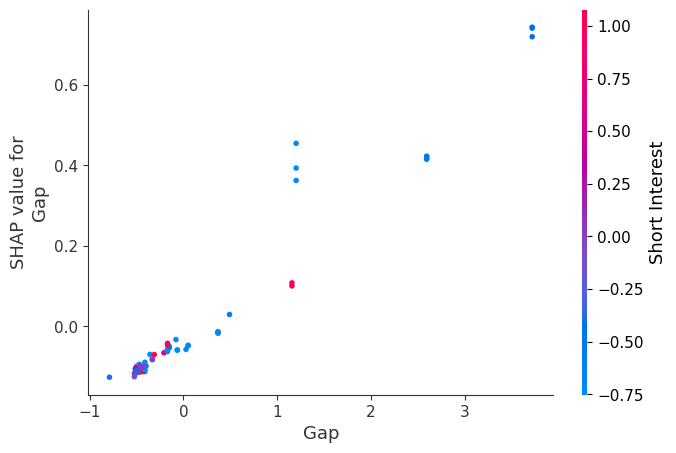

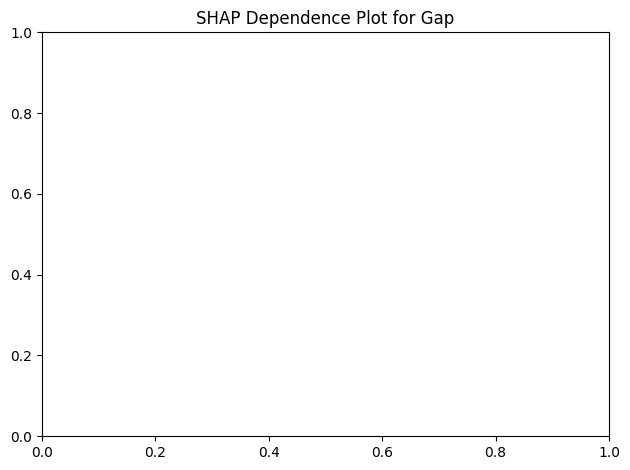

<Figure size 1200x800 with 0 Axes>

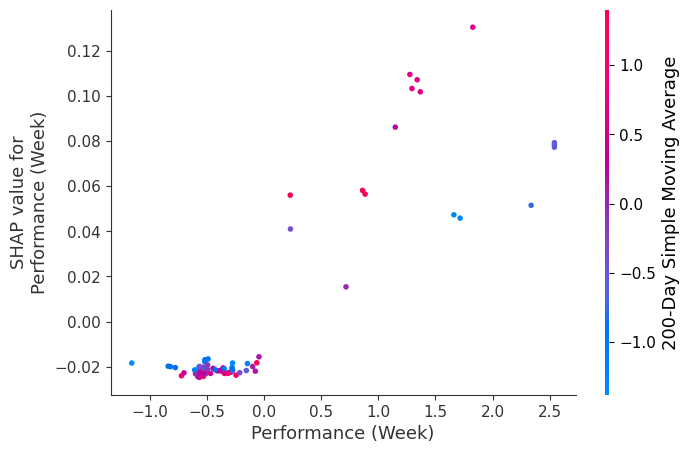

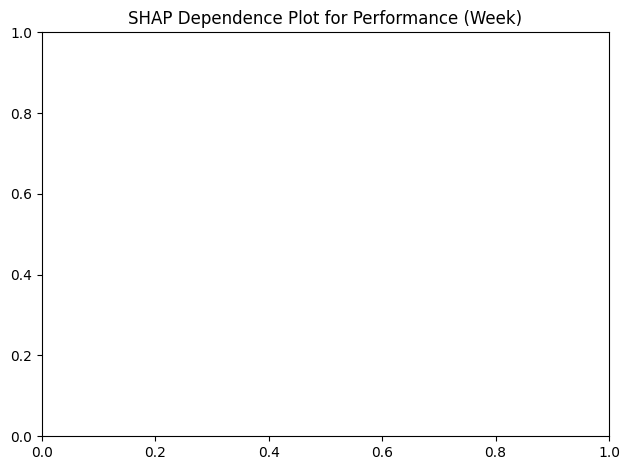

<Figure size 1200x800 with 0 Axes>

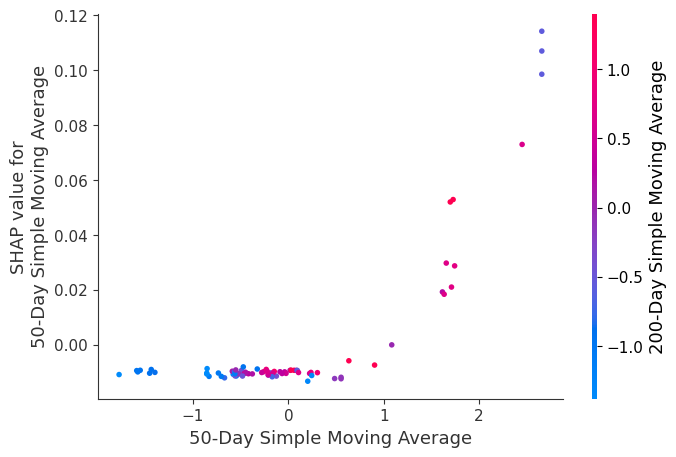

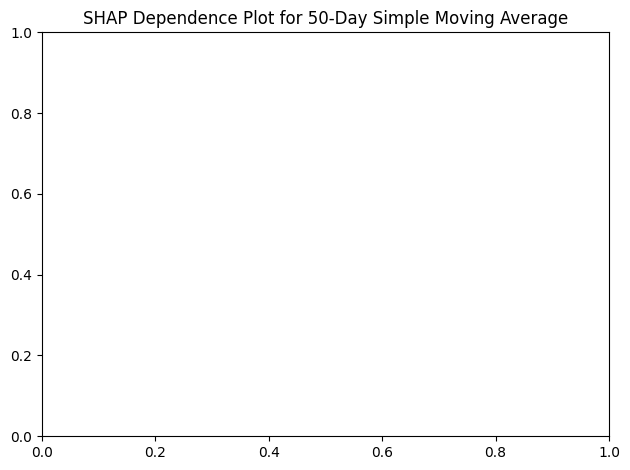

In [ ]:
!pip install shap
import shap
import matplotlib.pyplot as plt

# Create a SHAP KernelExplainer
explainer = shap.KernelExplainer(gb.predict, shap.sample(X_test_scaled, 100))

# Calculate SHAP values for a subset of the test data
shap_values = explainer.shap_values(X_test_scaled[:100], nsamples=100)

# Summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_scaled[:100], plot_type="bar", feature_names=feature_columns)
plt.title('SHAP Feature Importance')
plt.tight_layout()
plt.show()

# Detailed SHAP summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_scaled[:100], feature_names=feature_columns)
plt.title('SHAP Summary Plot')
plt.tight_layout()
plt.show()

# SHAP dependence plots for top features
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': np.abs(shap_values).mean(0)
}).sort_values('importance', ascending=False)

top_features = feature_importance['feature'].head(3).tolist()
for feature in top_features:
    plt.figure(figsize=(12, 8))
    shap.dependence_plot(feature, shap_values, X_test_scaled[:100], feature_names=feature_columns)
    plt.title(f'SHAP Dependence Plot for {feature}')
    plt.tight_layout()
    plt.show()


Feature Importances (including product features):
                                            feature  importance
688  Performance (YTD)*50-Day Simple Moving Average    0.939677
640                       Performance (Quarter)*Gap    0.013388
31                                              Gap    0.009465
131              Shares Float*Performance (4 Hours)    0.003771
603              Performance (Week)*Relative Volume    0.003487
..                                              ...         ...
770        200-Day Simple Moving Average*Prev Close   -0.000144
667            Performance (Year)*Performance (YTD)   -0.000176
161       Insider Ownership*Performance (3 Minutes)   -0.000176
399       Performance (2 Minutes)*Volatility (Week)   -0.000295
575        Performance (4 Hours)*Volatility (Month)   -0.000554

[820 rows x 2 columns]


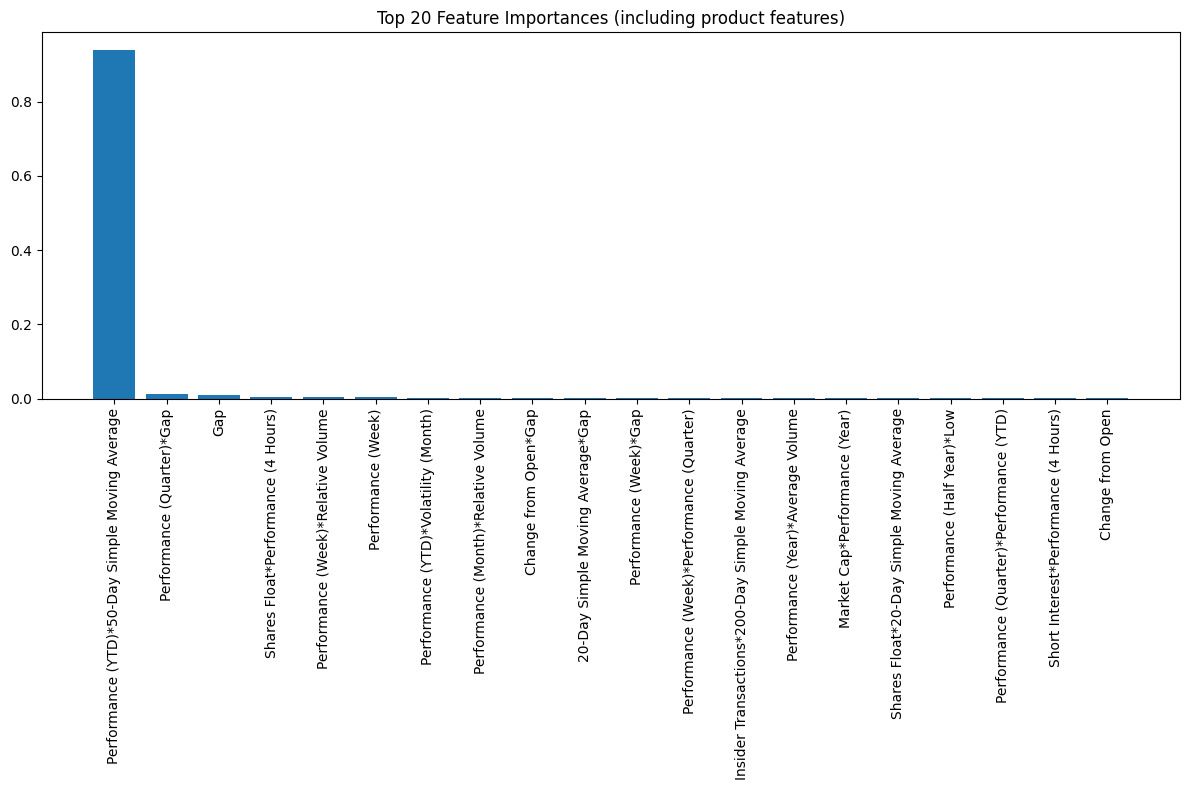

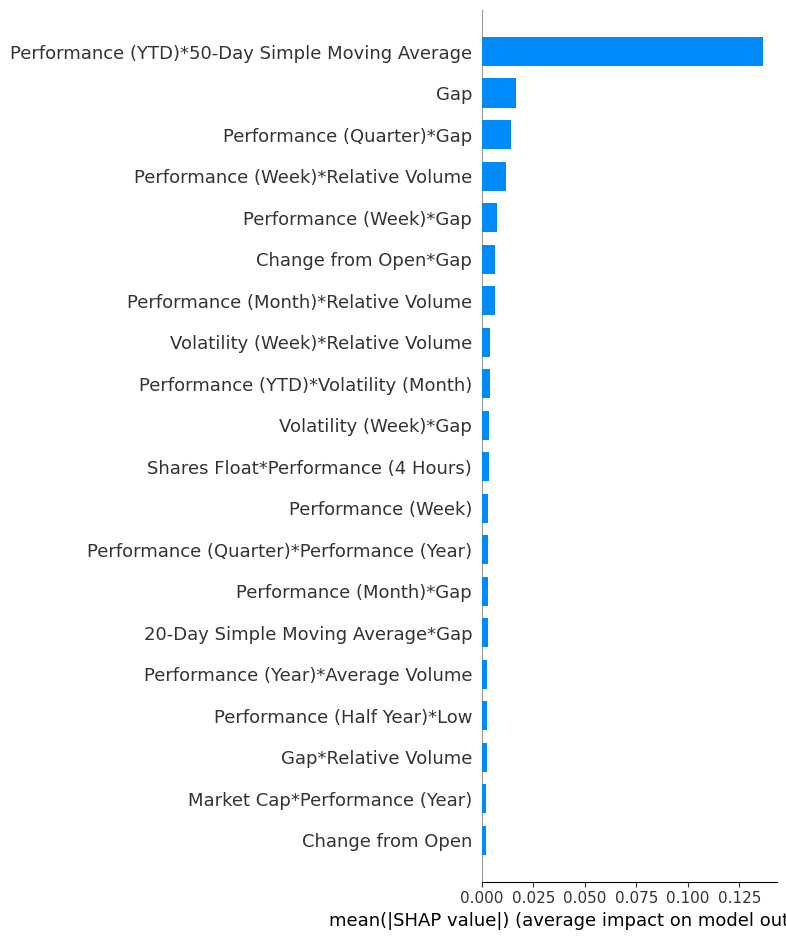

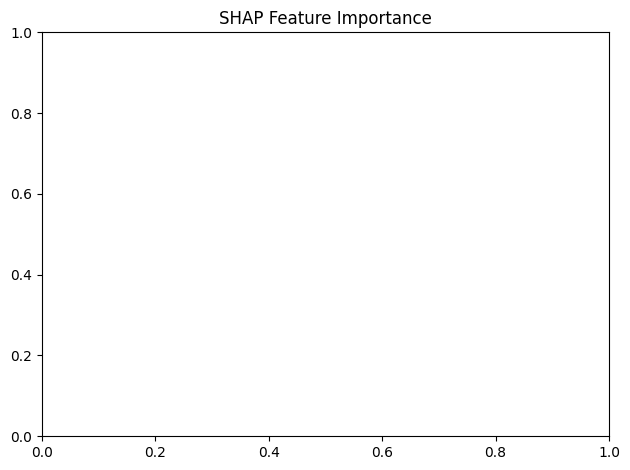

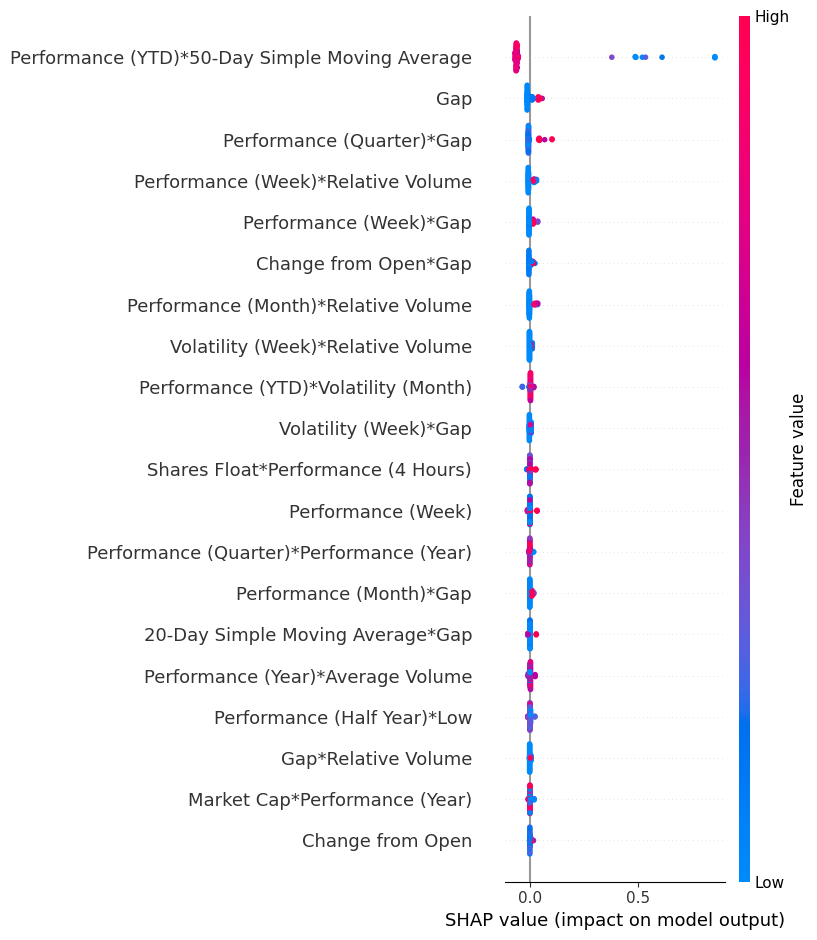

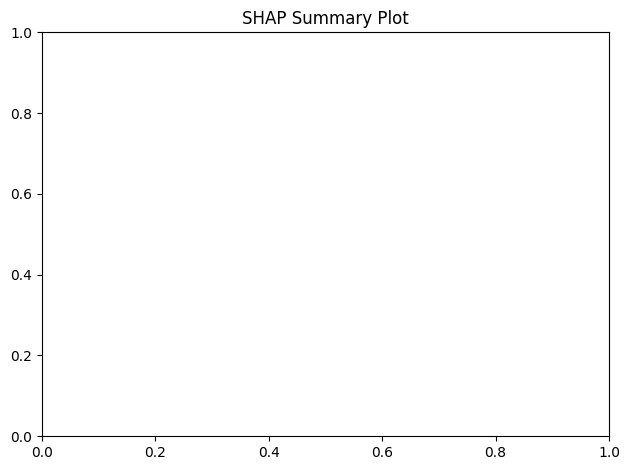

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import itertools
import shap
from google.colab import drive
# Function to create product features
def create_product_features(X):
    numeric_cols = X.select_dtypes(include=[np.number]).columns
    product_features = {}
    for col1, col2 in itertools.combinations(numeric_cols, 2):
        product_features[f'{col1}*{col2}'] = X[col1] * X[col2]
    return pd.concat([X, pd.DataFrame(product_features)], axis=1)

# Create product features
X_with_products = create_product_features(X.copy())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_with_products, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Train Gradient Boosting model
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train_scaled, y_train)

# Calculate permutation importance
perm_importance = permutation_importance(gb, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Create and sort feature importance DataFrame
feature_importance = pd.DataFrame({
    'feature': X_with_products.columns,
    'importance': perm_importance.importances_mean
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Print feature importances
print("\nFeature Importances (including product features):")
print(feature_importance)

# Visualize feature importances
plt.figure(figsize=(12, 8))
plt.bar(feature_importance['feature'][:20], feature_importance['importance'][:20])
plt.xticks(rotation=90)
plt.title('Top 20 Feature Importances (including product features)')
plt.tight_layout()
plt.show()

# SHAP analysis
explainer = shap.TreeExplainer(gb)
shap_values = explainer.shap_values(X_test_scaled)

# Summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar", feature_names=X_with_products.columns)
plt.title('SHAP Feature Importance')
plt.tight_layout()
plt.show()

# Detailed SHAP summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_with_products.columns)
plt.title('SHAP Summary Plot')
plt.tight_layout()
plt.show()